#### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.impute import KNNImputer
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Load the data using Pandas

In [2]:
df_train = pd.read_csv("data/train.csv", index_col="Customer ID")

We can view it using the head function

In [3]:
df_train.head(5)

Name Gender  Age  Income (USD) Income Stability  \
Customer ID                                                                 
C-36995       Frederica Shealy      F   56       1933.05              Low   
C-33999      America Calderone      M   32       4952.91              Low   
C-3770           Rosetta Verne      F   65        988.19             High   
C-26480             Zoe Chitty      F   65           NaN             High   
C-23459           Afton Venema      F   31       2614.77              Low   

            Profession     Type of Employment    Location  \
Customer ID                                                 
C-36995        Working            Sales staff  Semi-Urban   
C-33999        Working                    NaN  Semi-Urban   
C-3770       Pensioner                    NaN  Semi-Urban   
C-26480      Pensioner                    NaN       Rural   
C-23459        Working  High skill tech staff  Semi-Urban   

             Loan Amount Request (USD)  Current Loan Expenses (USD)  ...  \
Customer ID                                                          ...   
C-36995                       72809.58                       241.08  ...   
C-33999                       46837.47                       495.81  ...   
C-3770                        45593.04                       171.95  ...   
C-26480                       80057.92                       298.54  ...   
C-23459                      113858.89                       491.41  ...   

            Credit Score No. of Defaults  Has Active Credit Card  Property ID  \
Customer ID                                                                     
C-36995           809.44               0                     NaN          746   
C-33999           780.40               0             Unpossessed          608   
C-3770            833.15               0             Unpossessed          546   
C-26480           832.70               1             Unpossessed          890   
C-23459           745.55               1                  Active          715   

             Property Age Property Type  Property Location  Co-Applicant  \
Customer ID                                                                
C-36995           1933.05             4              Rural             1   
C-33999           4952.91             2              Rural             1   
C-3770             988.19             2              Urban             0   
C-26480               NaN             2         Semi-Urban             1   
C-23459           2614.77             4         Semi-Urban             1   

             Property Price Loan Sanction Amount (USD)  
Customer ID                                             
C-36995           119933.46                   54607.18  
C-33999            54791.00                   37469.98  
C-3770             72440.58                   36474.43  
C-26480           121441.51                   56040.54  
C-23459           208567.91                   74008.28  

[5 rows x 23 columns]

We now check if we have missing values 

In [4]:
df_train.isnull().sum()

Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, C-36995 to C-33003
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         30000 non-null  object 
 1   Gender                       29947 non-null  object 
 2   Age                          30000 non-null  int64  
 3   Income (USD)                 25424 non-null  float64
 4   Income Stability             28317 non-null  object 
 5   Profession                   30000 non-null  object 
 6   Type of Employment           22730 non-null  object 
 7   Location                     30000 non-null  object 
 8   Loan Amount Request (USD)    30000 non-null  float64
 9   Current Loan Expenses (USD)  29828 non-null  float64
 10  Expense Type 1               30000 non-null  object 
 11  Expense Type 2               30000 non-null  object 
 12  Dependents                   27507 non-null  float64
 13  Credit Score 

In [6]:
df_train.describe()

Age  Income (USD)  Loan Amount Request (USD)  \
count  30000.000000  2.542400e+04               30000.000000   
mean      40.092300  2.630574e+03               88826.333855   
std       16.045129  1.126272e+04               59536.949605   
min       18.000000  3.777000e+02                6048.240000   
25%       25.000000  1.650457e+03               41177.755000   
50%       40.000000  2.222435e+03               75128.075000   
75%       55.000000  3.090593e+03              119964.605000   
max       65.000000  1.777460e+06              621497.820000   

       Current Loan Expenses (USD)    Dependents  Credit Score  \
count                 29828.000000  27507.000000  28297.000000   
mean                    400.936876      2.253027    739.885381   
std                     242.545375      0.951162     72.163846   
min                    -999.000000      1.000000    580.000000   
25%                     247.667500      2.000000    681.880000   
50%                     375.205000      2.000000    739.820000   
75%                     521.292500      3.000000    799.120000   
max                    3840.880000     14.000000    896.260000   

       No. of Defaults   Property ID  Property Age  Property Type  \
count     30000.000000  30000.000000  2.515000e+04   30000.000000   
mean          0.193933    501.934700  2.631119e+03       2.460067   
std           0.395384    288.158086  1.132268e+04       1.118562   
min           0.000000      1.000000  3.777000e+02       1.000000   
25%           0.000000    251.000000  1.650450e+03       1.000000   
50%           0.000000    504.000000  2.223250e+03       2.000000   
75%           0.000000    751.000000  3.091408e+03       3.000000   
max           1.000000    999.000000  1.777460e+06       4.000000   

       Co-Applicant  Property Price  Loan Sanction Amount (USD)  
count  30000.000000    3.000000e+04                29660.000000  
mean      -4.743867    1.317597e+05                47649.342208  
std       74.614593    9.354955e+04                48221.146686  
min     -999.000000   -9.990000e+02                 -999.000000  
25%        1.000000    6.057216e+04                    0.000000  
50%        1.000000    1.099936e+05                35209.395000  
75%        1.000000    1.788807e+05                74261.250000  
max        1.000000    1.077967e+06               481907.320000

### 1. Data Cleaning and Processing -

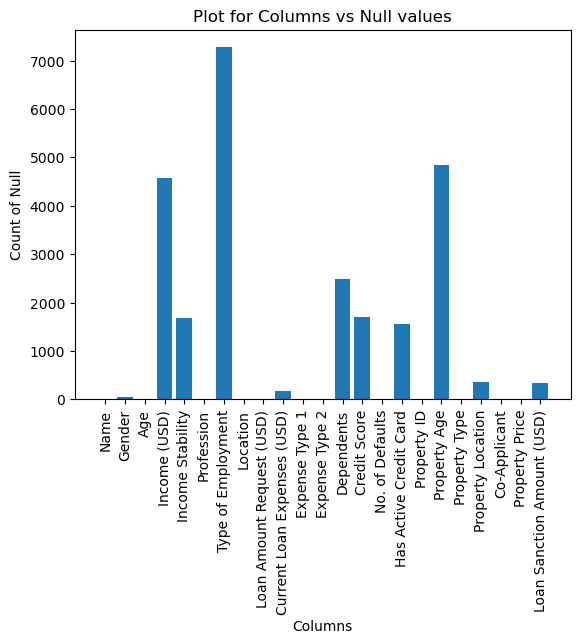

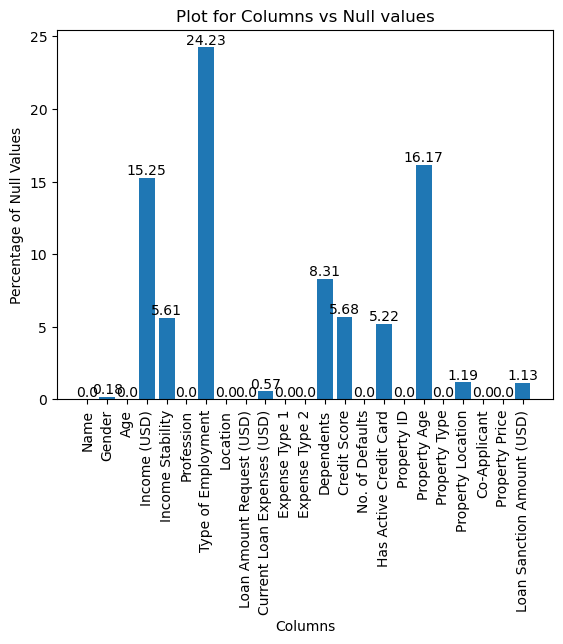

In [7]:
# Checking for any Nan value in each columns
cols = df_train.columns
dic_nan_values = {}
dic_prec_values = {}
for col in cols:
    # print(f"Nan -> {col} : {df_train[col].isnull().sum()}")
    dic_nan_values[col] = df_train[col].isnull().sum()
    dic_prec_values[col] = (df_train[col].isnull().sum() / df_train.shape[0]) * 100

bars = plt.bar(dic_nan_values.keys(), dic_nan_values.values())
plt.xlabel("Columns")
plt.ylabel("Count of Null")
plt.title("Plot for Columns vs Null values")
plt.xticks(rotation=90)
plt.show()

bars = plt.bar(dic_prec_values.keys(), dic_prec_values.values())
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Plot for Columns vs Null values")
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


plt.show()

In [8]:
numerical = [ 'Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'No. of Defaults', 'Property Age', 'Property Price', 'Loan Sanction Amount (USD)']
categorical = ['Gender','Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Property ID', 'Property Type', 'Property Location', 'Co-Applicant', 'Has Active Credit Card']

Replacing nan values

In [9]:
df_train.replace(-999, np.nan, inplace=True) #There are multiple data's with value -999.  They are used as placeholders for missing or invalid data, much like NaN values. 

for col in df_train.columns:
    print(f"Nan -> {col} : {round((df_train[col].isnull().sum() / df_train.shape[0]) * 100, 2)}")

Nan -> Name : 0.0
Nan -> Gender : 0.18
Nan -> Age : 0.0
Nan -> Income (USD) : 15.25
Nan -> Income Stability : 5.61
Nan -> Profession : 0.0
Nan -> Type of Employment : 24.23
Nan -> Location : 0.0
Nan -> Loan Amount Request (USD) : 0.0
Nan -> Current Loan Expenses (USD) : 1.16
Nan -> Expense Type 1 : 0.0
Nan -> Expense Type 2 : 0.0
Nan -> Dependents : 8.31
Nan -> Credit Score : 5.68
Nan -> No. of Defaults : 0.0
Nan -> Has Active Credit Card : 5.22
Nan -> Property ID : 0.0
Nan -> Property Age : 16.17
Nan -> Property Type : 0.0
Nan -> Property Location : 1.19
Nan -> Co-Applicant : 0.56
Nan -> Property Price : 1.17
Nan -> Loan Sanction Amount (USD) : 2.26


Since, the percentage of Nan values for loan sanction amount(USD)(Target variable) is less than 2%, we will go ahead and drop all the records where the values of the column loan sanction amount(USD).

In [10]:
df_train.dropna(inplace=True, subset=['Loan Sanction Amount (USD)'])

Seperating cols based on the method of imputing nan values

In [11]:
knn_num_cols = ['Age', 'Dependents', 'No. of Defaults', 'Credit Score']
mean_num_cols = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Property Age', 'Property Price', 'Loan Sanction Amount (USD)']
knn_cat = ['Gender','Income Stability', 'Profession', 'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2', 'Property ID', 'Property Type', 'Property Location', 'Co-Applicant', 'Has Active Credit Card']

Replacing with Median for numerical and Mode for categorical

In [12]:
for col in numerical:
    col_median = df_train[col].median()
    df_train[col].fillna(col_median, inplace=True)

for col in categorical:
    col_mode = df_train[col].mode()[0]
    df_train[col].fillna(col_mode, inplace=True)

In [13]:
for col in df_train.columns:
    print(f"Nan -> {col} : {round((df_train[col].isnull().sum() / df_train.shape[0]) * 100, 2)}")

Nan -> Name : 0.0
Nan -> Gender : 0.0
Nan -> Age : 0.0
Nan -> Income (USD) : 0.0
Nan -> Income Stability : 0.0
Nan -> Profession : 0.0
Nan -> Type of Employment : 0.0
Nan -> Location : 0.0
Nan -> Loan Amount Request (USD) : 0.0
Nan -> Current Loan Expenses (USD) : 0.0
Nan -> Expense Type 1 : 0.0
Nan -> Expense Type 2 : 0.0
Nan -> Dependents : 0.0
Nan -> Credit Score : 0.0
Nan -> No. of Defaults : 0.0
Nan -> Has Active Credit Card : 0.0
Nan -> Property ID : 0.0
Nan -> Property Age : 0.0
Nan -> Property Type : 0.0
Nan -> Property Location : 0.0
Nan -> Co-Applicant : 0.0
Nan -> Property Price : 0.0
Nan -> Loan Sanction Amount (USD) : 0.0


Outliers

In [14]:
# Replacing outliers with the average value for numerical data

for col in numerical:
    z_col = "z_score_" + "_".join(col.split(" "))
    df_train[z_col] = zscore(df_train[col])
    col_mean = round(df_train[col].mean(), 2)
    print(f"Number of outliers for {col} : {(abs(df_train[z_col]) > 3).sum()}")
    df_train.loc[np.abs(df_train[z_col]) > 3, col] = col_mean
    df_train = df_train.drop([z_col], axis=1)

Number of outliers for Age : 0
Number of outliers for Income (USD) : 4
Number of outliers for Loan Amount Request (USD) : 384
Number of outliers for Current Loan Expenses (USD) : 275
Number of outliers for Dependents : 420
Number of outliers for Credit Score : 0
Number of outliers for No. of Defaults : 0
Number of outliers for Property Age : 4
Number of outliers for Property Price : 405
Number of outliers for Loan Sanction Amount (USD) : 361


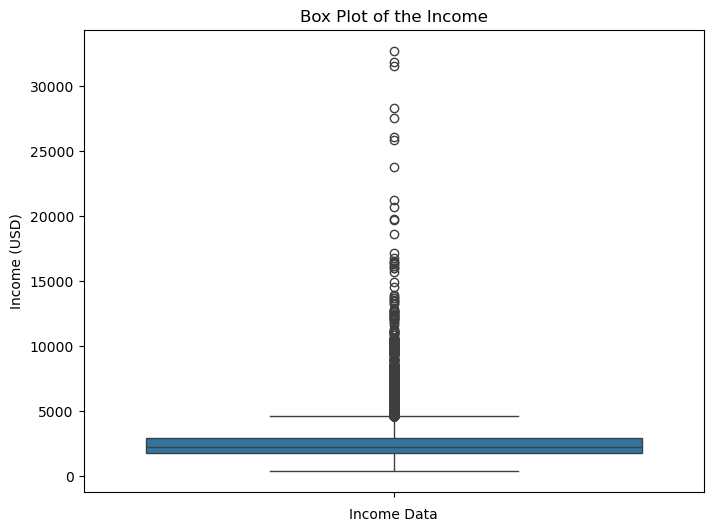

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train['Income (USD)'])

# Add title and labels
plt.title('Box Plot of the Income')
plt.xlabel('Income Data')
plt.show()

In [16]:
df_train

Name Gender   Age  Income (USD) Income Stability  \
Customer ID                                                                  
C-36995       Frederica Shealy      F  56.0       1933.05              Low   
C-33999      America Calderone      M  32.0       4952.91              Low   
C-3770           Rosetta Verne      F  65.0        988.19             High   
C-26480             Zoe Chitty      F  65.0       2222.86             High   
C-23459           Afton Venema      F  31.0       2614.77              Low   
...                        ...    ...   ...           ...              ...   
C-43723      Angelyn Clevenger      M  38.0       4969.41              Low   
C-32511           Silas Slaugh      M  20.0       1606.88              Low   
C-5192            Carmelo Lone      F  49.0       2222.86              Low   
C-12172          Carolann Osby      M  38.0       2417.71              Low   
C-33003      Bridget Garibaldi      F  63.0       3068.24             High   

                       Profession     Type of Employment    Location  \
Customer ID                                                            
C-36995                   Working            Sales staff  Semi-Urban   
C-33999                   Working               Laborers  Semi-Urban   
C-3770                  Pensioner               Laborers  Semi-Urban   
C-26480                 Pensioner               Laborers       Rural   
C-23459                   Working  High skill tech staff  Semi-Urban   
...                           ...                    ...         ...   
C-43723      Commercial associate               Managers       Urban   
C-32511                   Working               Laborers  Semi-Urban   
C-5192                    Working            Sales staff       Urban   
C-12172                   Working         Security staff  Semi-Urban   
C-33003                 Pensioner               Laborers       Rural   

             Loan Amount Request (USD)  Current Loan Expenses (USD)  ...  \
Customer ID                                                          ...   
C-36995                       72809.58                       241.08  ...   
C-33999                       46837.47                       495.81  ...   
C-3770                        45593.04                       171.95  ...   
C-26480                       80057.92                       298.54  ...   
C-23459                      113858.89                       491.41  ...   
...                                ...                          ...  ...   
C-43723                       76657.90                       722.34  ...   
C-32511                       66595.14                       253.04  ...   
C-5192                        81410.08                       583.11  ...   
C-12172                      142524.10                       378.29  ...   
C-33003                      156290.54                       693.94  ...   

            Credit Score No. of Defaults  Has Active Credit Card  Property ID  \
Customer ID                                                                     
C-36995           809.44             0.0                  Active          746   
C-33999           780.40             0.0             Unpossessed          608   
C-3770            833.15             0.0             Unpossessed          546   
C-26480           832.70             1.0             Unpossessed          890   
C-23459           745.55             1.0                  Active          715   
...                  ...             ...                     ...          ...   
C-43723           869.61             0.0             Unpossessed          566   
C-32511           729.41             0.0                Inactive          175   
C-5192            739.91             0.0                  Active          959   
C-12172           677.27             1.0             Unpossessed          375   
C-33003           815.44             0.0                  Active          344   

             Property Age Prope

In [17]:
df_train.to_csv('data/preprocessed.csv')

### 2. Exploratory Data Analysis

EDA is a crucial step in data science which invloves analyzing and visualising data to understand the key characteristics of the data, to uncover patterns and identify relatonships between the variables. 

### 2.1 Univariate analysis

It is a statistical analysis which focuses on examining and interpreting a single variable at a time.


Functions used for EDA of each feature:

In [18]:
#This function counts the freqquency of each observation
def count_value(df_train,feature):
    
    cnt = df_train[feature].value_counts()
    # normalize the value count. Normalization is done to enhance interpretability and provide better understanding of the distributions. 
    cnt_norm = df_train[feature].value_counts(normalize=True) * 100
    cnt_concat = pd.concat([cnt, cnt_norm], axis=1)
    cnt_concat.columns = ['Count', 'Frequency (%)']
    return cnt_concat

In [19]:
#This function creates the bar chart for the specific features.
def create_bar_plot(df_train, feature):

    fig, ax = plt.subplots(figsize=(10,10))
    
    # Get the value counts and plot them
    value_counts = count_value(df_train, feature)
    sns.barplot(x=value_counts.index, y=value_counts['Count'], ax=ax)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'{feature} Count')
    ax.tick_params(axis='x', rotation=45)

    # Show the plot
    plt.show()

In [20]:
def create_hist_plot(df_train, feature, the_bins=50):
    
    fig, ax = plt.subplots(figsize=(18, 10))
    
    if feature == 'Property Age':
        data_to_plot = df_train[feature] / 365.25  # Convert Property Age to years
    else:
        data_to_plot = df_train[feature]  

    sns.histplot(data=data_to_plot, bins=the_bins, kde=True, ax=ax)

    ax.set_title(f'{feature} distribution')
    plt.show()

In [21]:
def create_pie_chart(df_train, feature):

    ratio_size = count_value(df_train, feature)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the pie chart with percentages
    wedges, texts, autotexts = ax.pie(
        ratio_size['Frequency (%)'], 
        labels=ratio_size.index, 
        autopct='%1.2f%%', 
        startangle=90, 
        wedgeprops={'edgecolor': 'red'}
    )

    ax.set_title(f'Pie chart of {feature}')
    ax.legend(loc='best')

    circle = plt.Circle((0, 0), 0.8, color='white')
    ax.add_artist(circle)
    ax.axis('equal')

    plt.show()


In [22]:
def create_box_plot(df, feature):

    fig, ax = plt.subplots(figsize=(2, 8))

    if feature == 'Property Age':
        data = df[feature] / 365.25
    else:
        data = df[feature]

    sns.boxplot(y=data, ax=ax)
    
    ax.set_title(f'{feature} distribution (Boxplot)')
    plt.show()

In [23]:
#This function displays general information about the fearure.
def get_feature_information(df_train, feature):
    
    if feature == 'Age' or feature == 'Income (USD)' or feature ==  'Loan Amount Request (USD)' or feature ==  'Current Loan Expenses (USD)' or feature ==  'Credit Score' or feature ==  'Property Price' or feature ==  'Loan Sanction Amount (USD)':
            print('Description:\n{}'.format(df_train[feature].describe()))
            print('-'*50)
            print('Skewness:\n{}'.format(df_train[feature].skew()))
    elif feature == 'Property Age':
            print('Description:\n{}'.format(df_train[feature].describe()/365.25))
            print('-'*50)
            print('Skewness:\n{}'.format(df_train[feature].skew()))
    else:
            print('Description:\n{}'.format(df_train[feature].describe()))
            print('-'*50)
            value_cnt = count_value(df_train,feature)
            print('Value count:\n{}'.format(value_cnt))

#### Age -

In [24]:
get_feature_information(df_train, 'Age')

Description:
count    29322.000000
mean        40.119910
std         16.054988
min         18.000000
25%         25.000000
50%         40.000000
75%         55.000000
max         65.000000
Name: Age, dtype: float64
--------------------------------------------------
Skewness:
0.043851678057733434


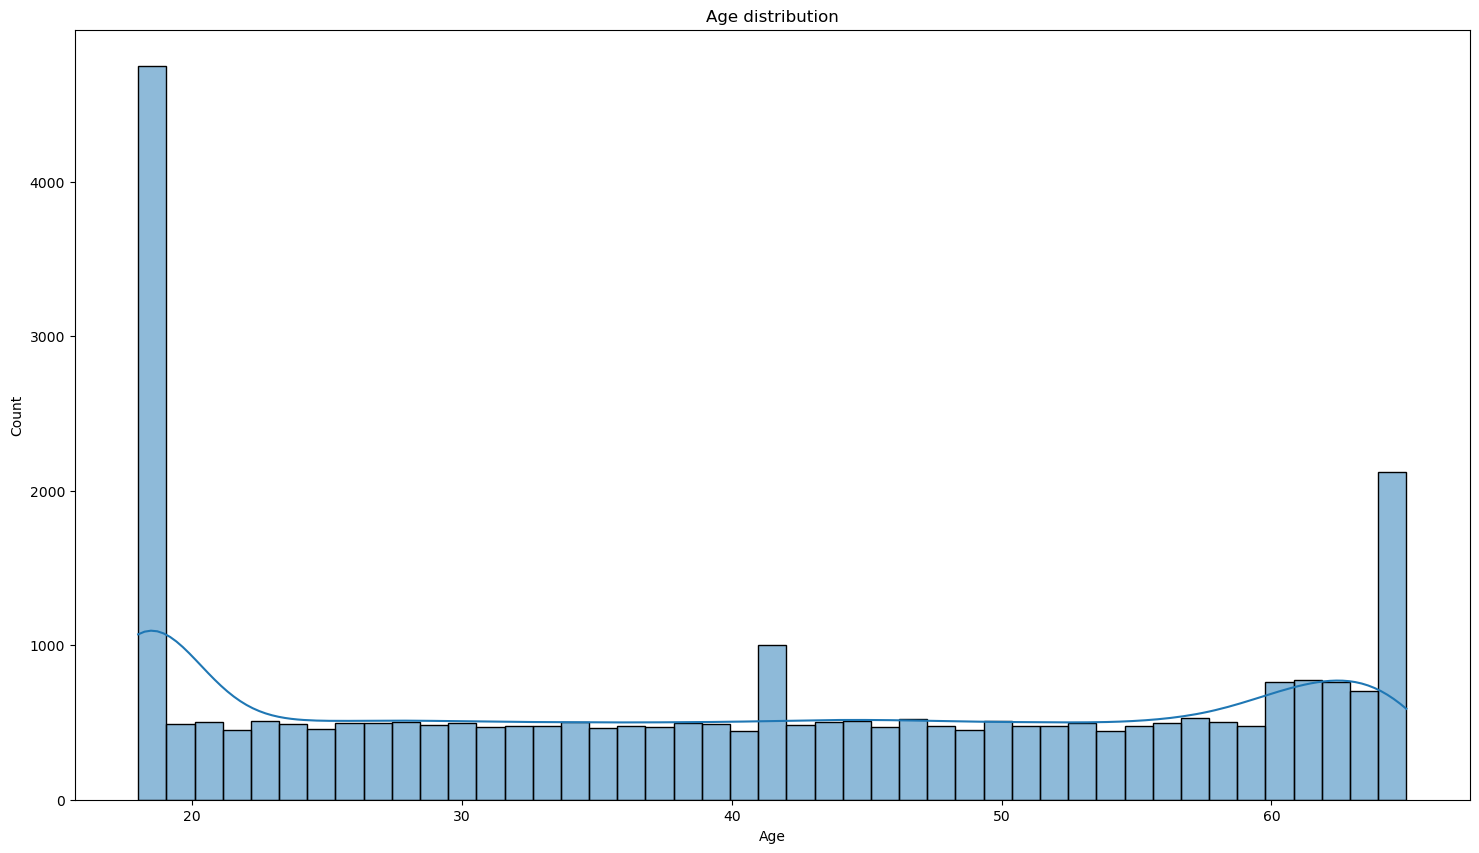

In [25]:
create_hist_plot(df_train, 'Age', the_bins=45)


Interpretation:
1. From the histogram plot we can see that Age is not normally distributed.
2. There is a large number of applicatnts who are 18 and 65 year old.
3. Mean and median of age is 40 years old.
4. Skewness is 0.0461 which means the distribution is almost symmetric. 

#### Income -

In [26]:
get_feature_information(df_train, 'Income (USD)')

Description:
count    29322.000000
mean      2502.393681
std       1367.507116
min        377.700000
25%       1741.562500
50%       2222.860000
75%       2869.770000
max      32726.980000
Name: Income (USD), dtype: float64
--------------------------------------------------
Skewness:
4.503475629043453


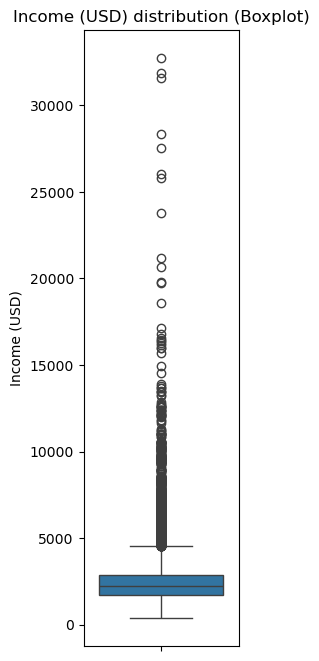

In [27]:
create_box_plot(df_train, 'Income (USD)')

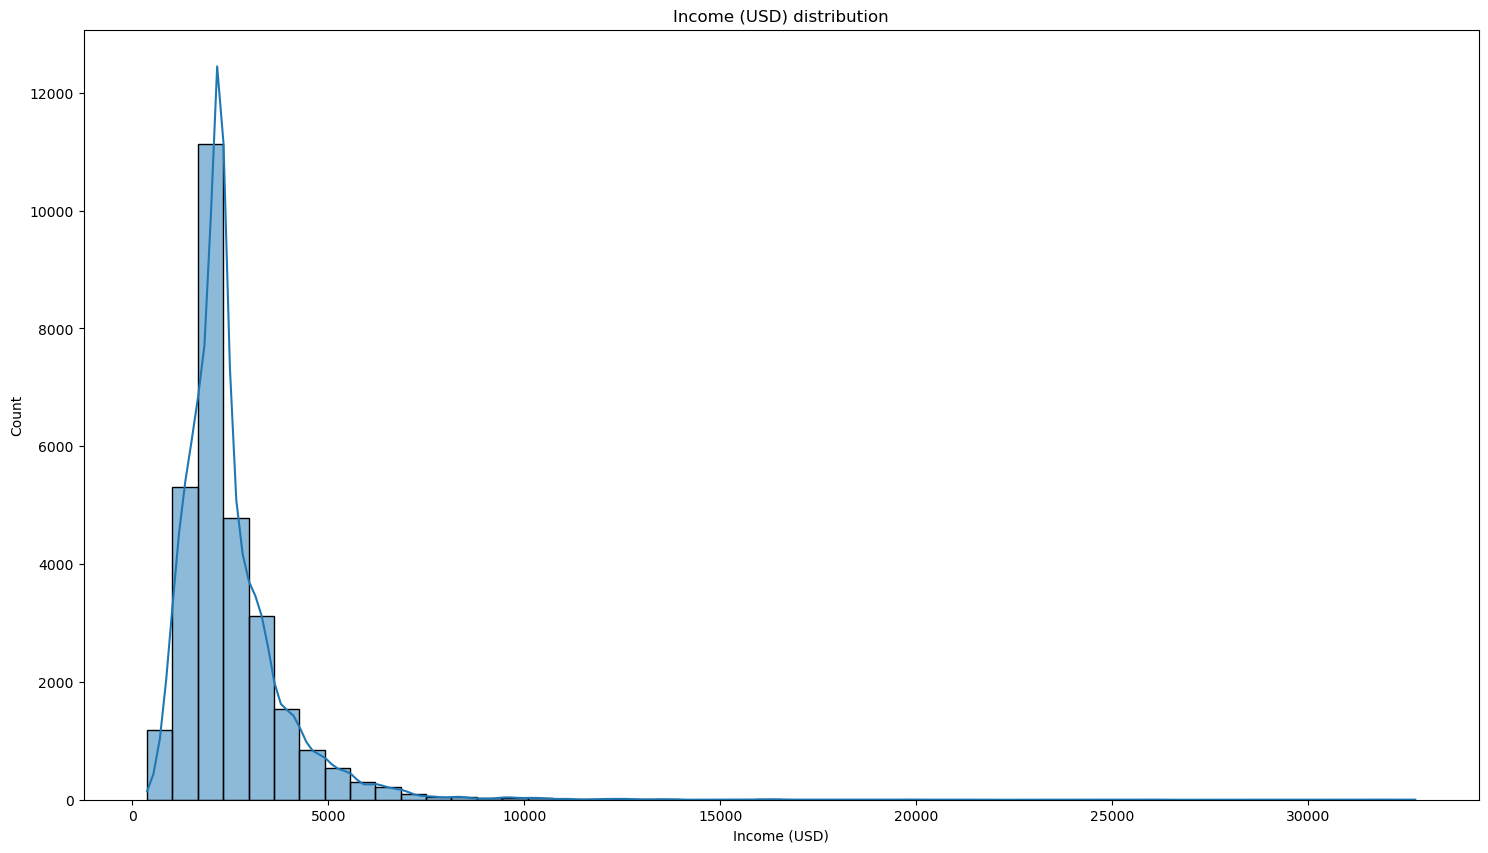

In [28]:
create_hist_plot(df_train, 'Income (USD)', the_bins=50)


Interpretation:

1. The Income is positively skewed.
2. The median income is $2472.265.

#### Gender -

In [29]:
get_feature_information(df_train, 'Gender')

Description:
count     29322
unique        2
top           M
freq      14773
Name: Gender, dtype: object
--------------------------------------------------
Value count:
        Count  Frequency (%)
Gender                      
M       14773      50.381966
F       14549      49.618034


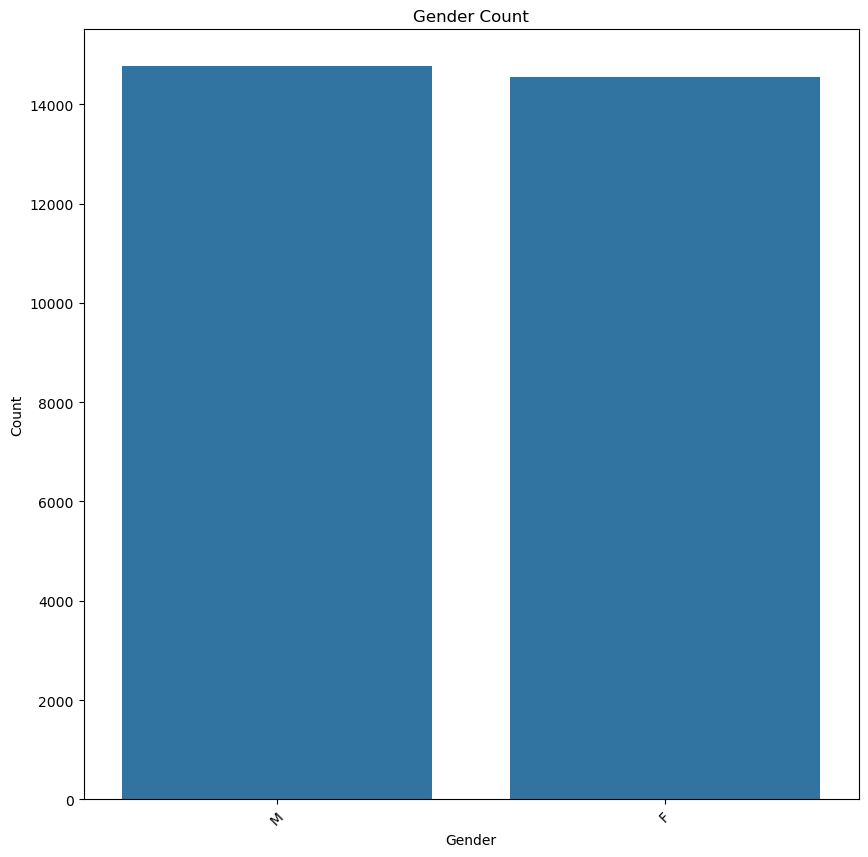

In [30]:
create_bar_plot(df_train,'Gender')

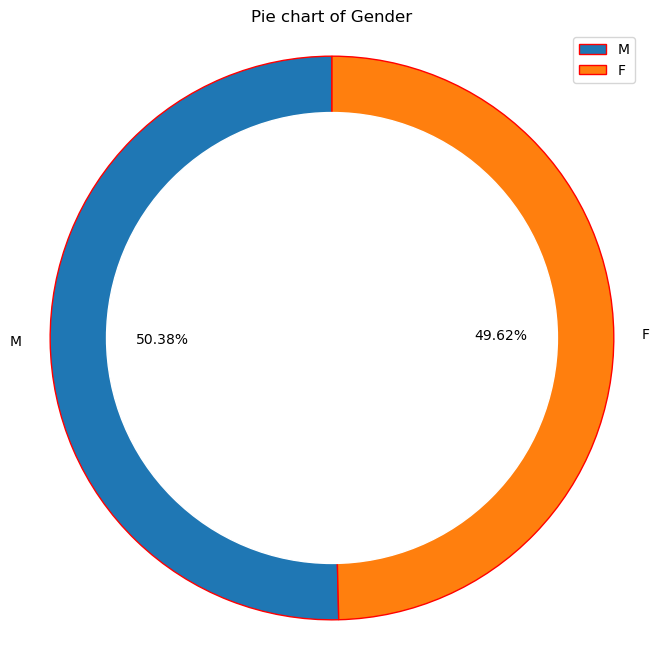

In [31]:
create_pie_chart(df_train,'Gender')


Interpretation:
1. We have encoded 
1. From the graph, it is clear that we have the same number of Male and Female (50.38% vs 49.62%)

#### Income Stability -

In [32]:
get_feature_information(df_train,'Income Stability')

Description:
count     29322
unique        2
top         Low
freq      26797
Name: Income Stability, dtype: object
--------------------------------------------------
Value count:
                  Count  Frequency (%)
Income Stability                      
Low               26797      91.388718
High               2525       8.611282


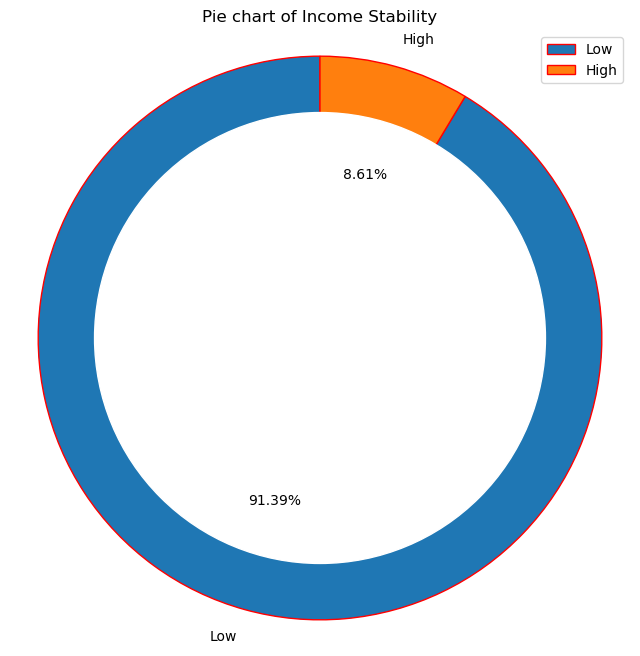

In [33]:
create_pie_chart(df_train,'Income Stability')


Interpretation:
1. Less than 10% of applicants have a high income stability
2. 90% of applicants have a low income stability

#### Profession -

In [34]:
get_feature_information(df_train,'Profession')

Description:
count       29322
unique          8
top       Working
freq        16541
Name: Profession, dtype: object
--------------------------------------------------
Value count:
                      Count  Frequency (%)
Profession                                
Working               16541      56.411568
Commercial associate   7781      26.536389
Pensioner              2697       9.197872
State servant          2297       7.833708
Unemployed                2       0.006821
Businessman               2       0.006821
Student                   1       0.003410
Maternity leave           1       0.003410


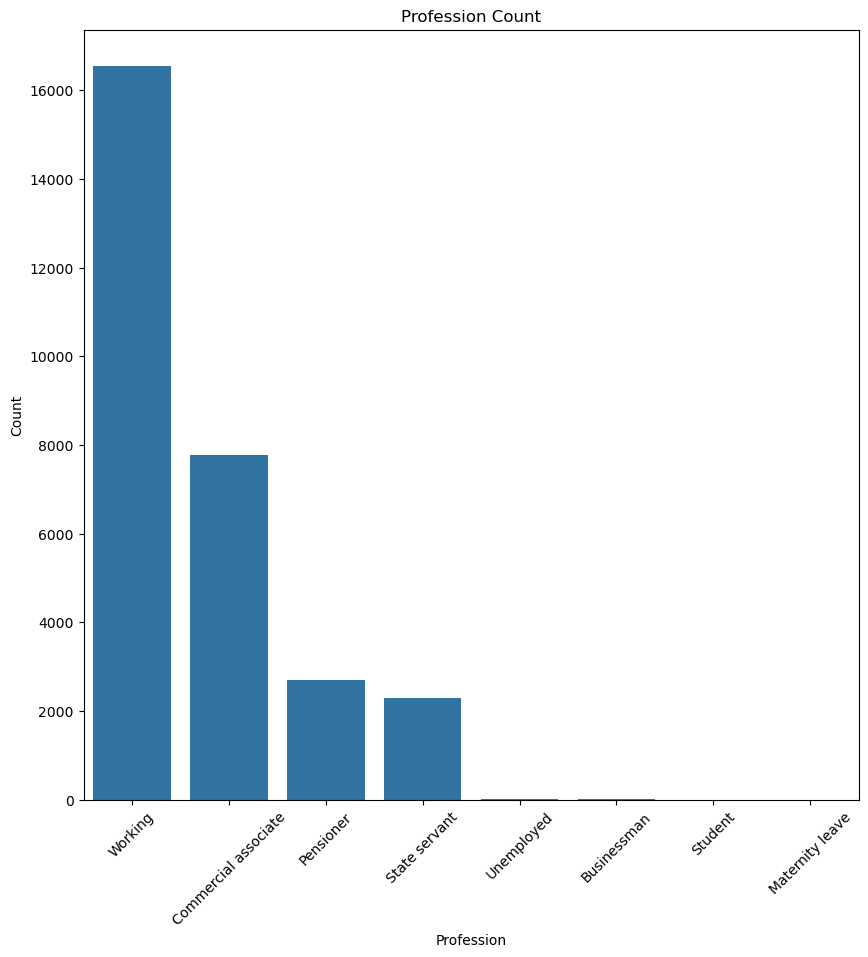

In [35]:
create_bar_plot(df_train,'Profession')



Interpretation:

1. Most applicants are currently working, the second most represented category is commercial associate.
2. We also have a number of applicants that have pensioned and state servant.
3. The most unrepresented category are the unemployed, businessman, students and women who are on maternity leaves.

#### Type of employment -

In [36]:
get_feature_information(df_train,'Type of Employment')

Description:
count        29322
unique          18
top       Laborers
freq         12572
Name: Type of Employment, dtype: object
--------------------------------------------------
Value count:
                       Count  Frequency (%)
Type of Employment                         
Laborers               12572      42.875657
Sales staff             3671      12.519610
Core staff              3153      10.753018
Managers                2433       8.297524
Drivers                 1571       5.357752
Accountants             1343       4.580179
High skill tech staff   1281       4.368733
Medicine staff           838       2.857922
Security staff           564       1.923470
Cooking staff            548       1.868904
Cleaning staff           334       1.139076
Private service staff    331       1.128845
Secretaries              157       0.535434
Low-skill Laborers       150       0.511561
Waiters/barmen staff     146       0.497920
Realty agents             85       0.289885
IT staff       

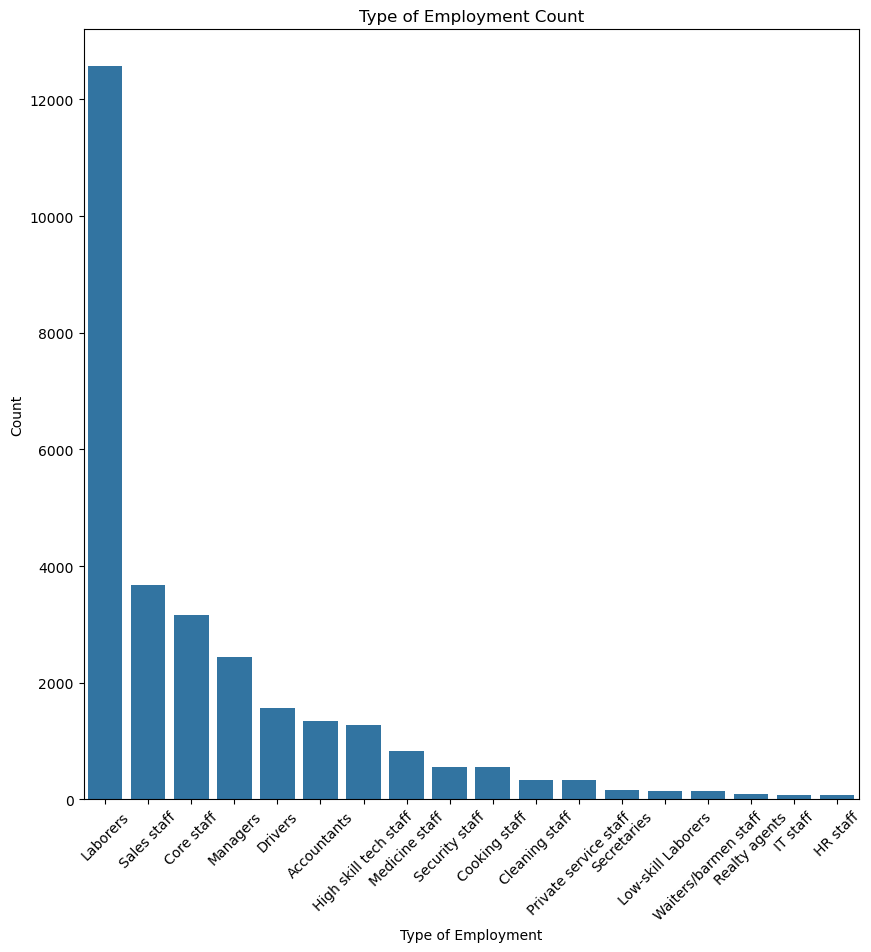

In [37]:
create_bar_plot(df_train,'Type of Employment')


Interpretation:

1. The most represented employment are laborers, sales staff, core staff and managers.
2. The least represented employment are secretaries, low-skill laborers, waiters/barmen staff, realty agents, IT staff, HR staff.

#### Location - 

In [38]:
get_feature_information(df_train,'Location')

Description:
count          29322
unique             3
top       Semi-Urban
freq           21078
Name: Location, dtype: object
--------------------------------------------------
Value count:
            Count  Frequency (%)
Location                        
Semi-Urban  21078      71.884592
Rural        5220      17.802333
Urban        3024      10.313076


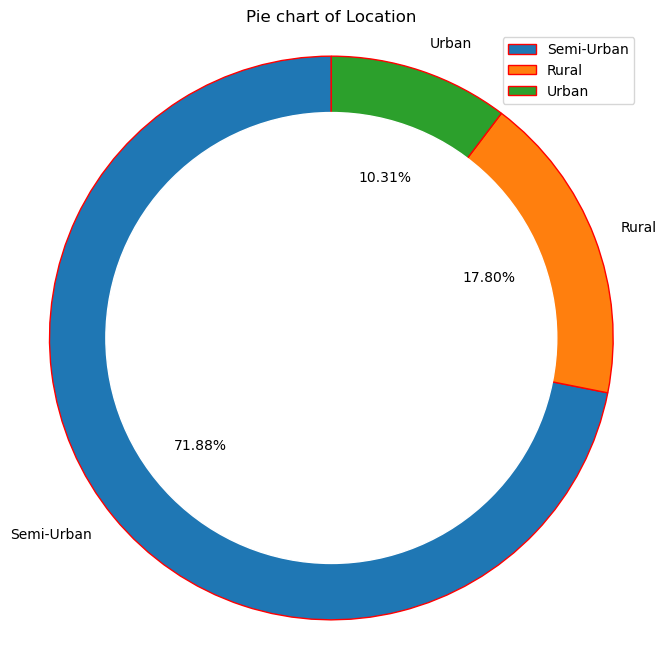

In [39]:
create_pie_chart(df_train,'Location')


Interpretation:

1. 7 out 10 applicants live in a semi-urban location
2. Second most common location is the rural location
3. Only 1 in 10 applicant live in an urban location

<h4> Loan Amount Request - <h4>

In [40]:
get_feature_information(df_train,'Loan Amount Request (USD)')


Description:
count     29322.000000
mean      85978.031202
std       53910.438363
min        6048.240000
25%       41182.645000
50%       75094.785000
75%      116869.387500
max      267111.770000
Name: Loan Amount Request (USD), dtype: float64
--------------------------------------------------
Skewness:
0.9134972967545518


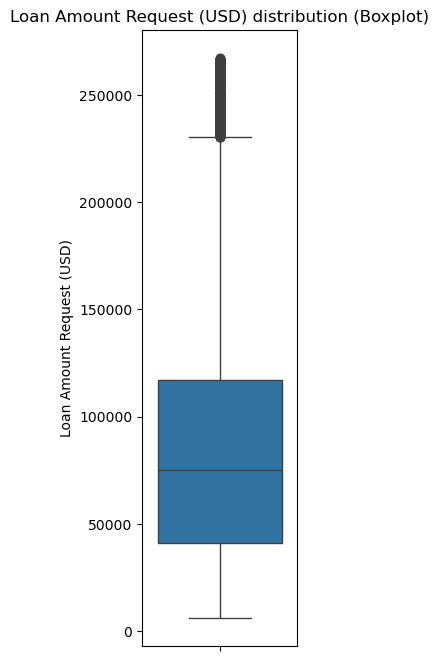

In [41]:
create_box_plot(df_train, 'Loan Amount Request (USD)')


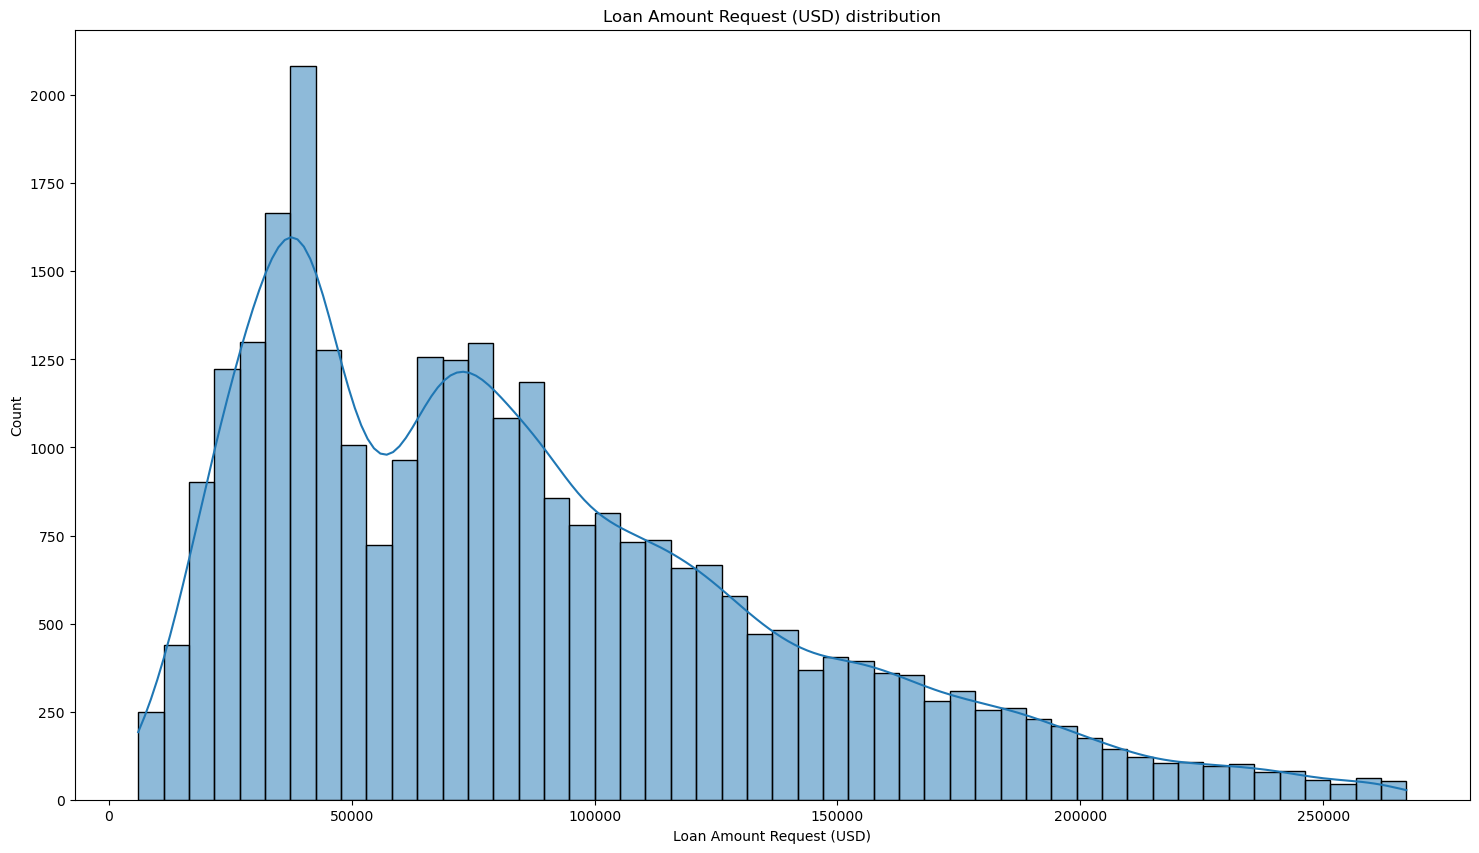

In [42]:
create_hist_plot(df_train, 'Loan Amount Request (USD)')


Interpretation:

1. The median of the loan amount request is $75114.085000
2. The loan amount request distribution is positively skewed.

<h4> Current Loan Expenses - <h4>

In [43]:
get_feature_information(df_train,'Current Loan Expenses (USD)')


Description:
count    29322.000000
mean       400.267829
std        194.918909
min         33.760000
25%        251.985000
50%        376.350000
75%        512.580000
max       1057.830000
Name: Current Loan Expenses (USD), dtype: float64
--------------------------------------------------
Skewness:
0.7184565937005317


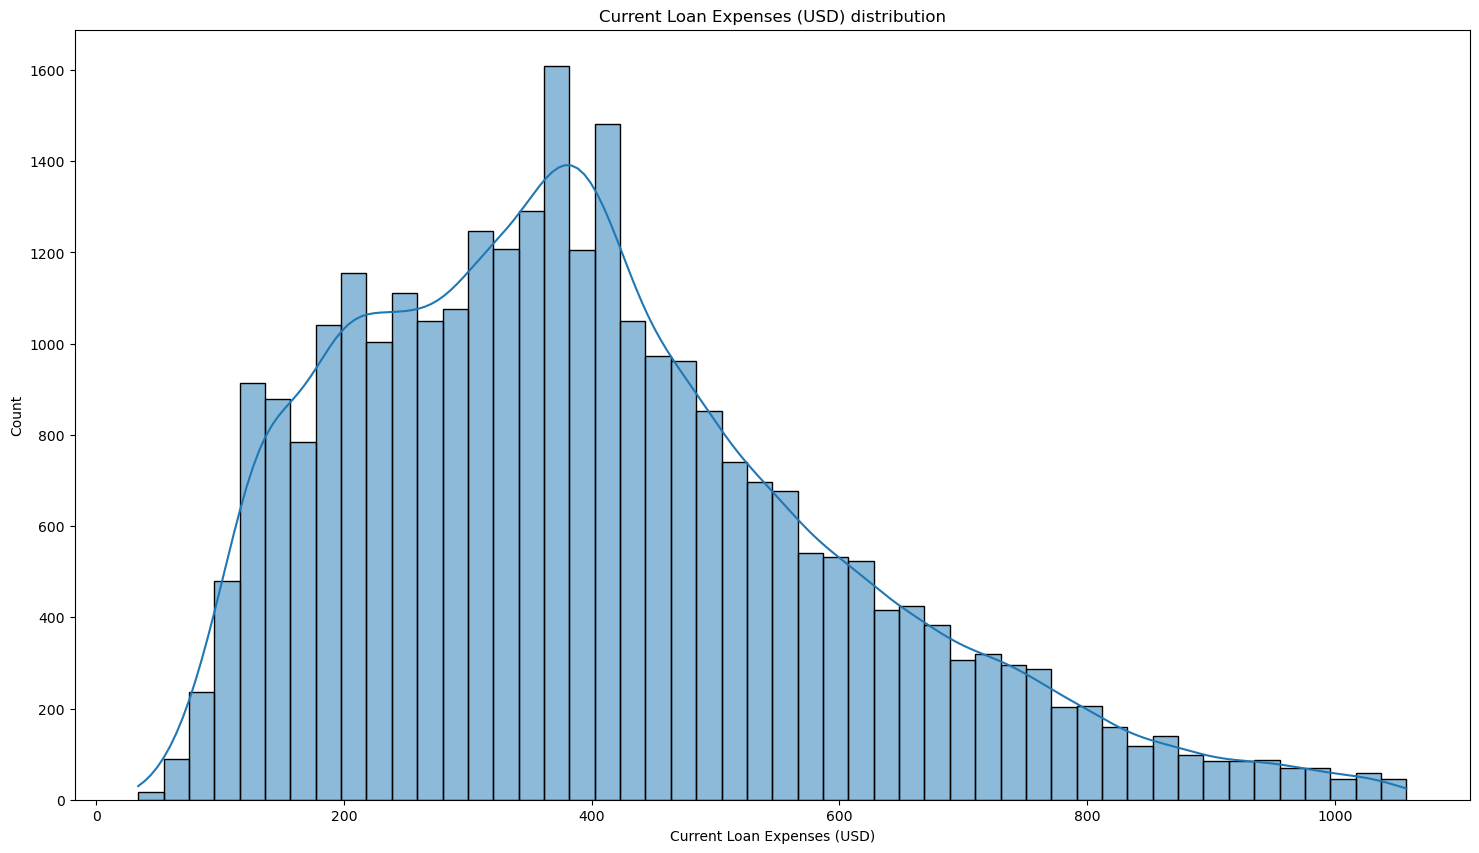

In [44]:
create_hist_plot(df_train, 'Current Loan Expenses (USD)')


Interpretation:

1. The mean current loan expenses is $402.77
2. The current loan expenses is positively skewed

<h4> Credit Score - <h4>

In [45]:
get_feature_information(df_train,'Credit Score')


Description:
count    29322.000000
mean       739.899467
std         70.119588
min        580.000000
25%        685.320000
50%        739.910000
75%        795.140000
max        896.260000
Name: Credit Score, dtype: float64
--------------------------------------------------
Skewness:
-0.021547805235619173


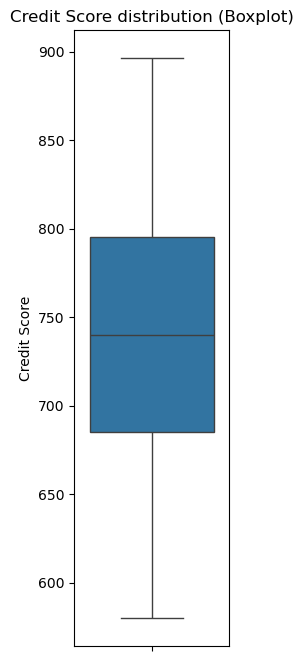

In [46]:
create_box_plot(df_train, 'Credit Score')


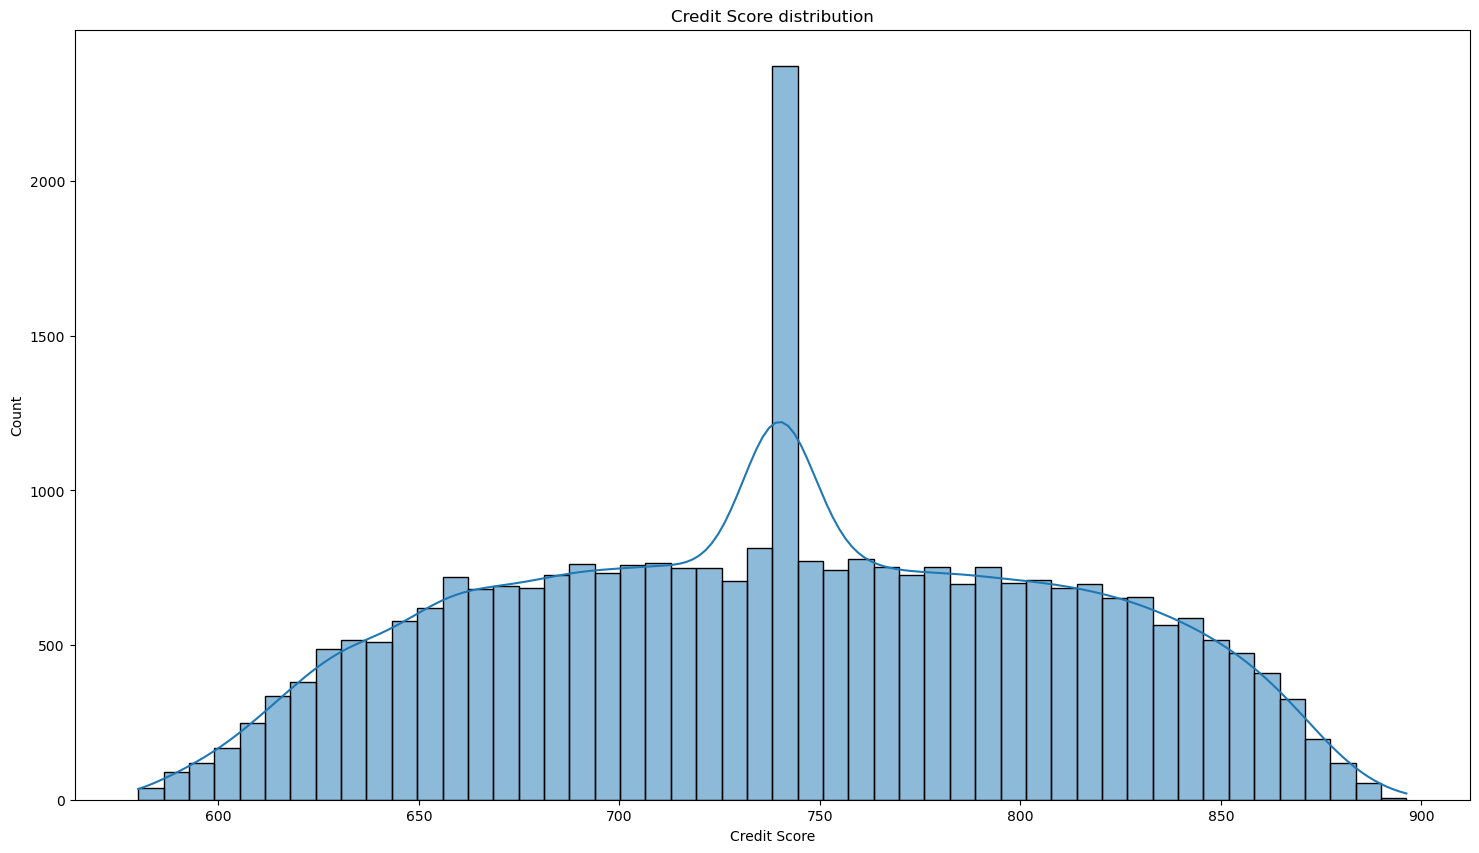

In [47]:
create_hist_plot(df_train, 'Credit Score')


Interpretation:

1. The mean and median of applicants's credit score is 739.85
2. The credit score does not seems to be skewed but it is not normally distributed

<h4> Loan Sanction Amount - <h4>

In [48]:
get_feature_information(df_train,'Loan Sanction Amount (USD)')

Description:
count     29322.000000
mean      46065.779403
std       43990.166350
min           0.000000
25%           0.000000
50%       36064.225000
75%       72535.995000
max      192824.800000
Name: Loan Sanction Amount (USD), dtype: float64
--------------------------------------------------
Skewness:
0.9091874671019101


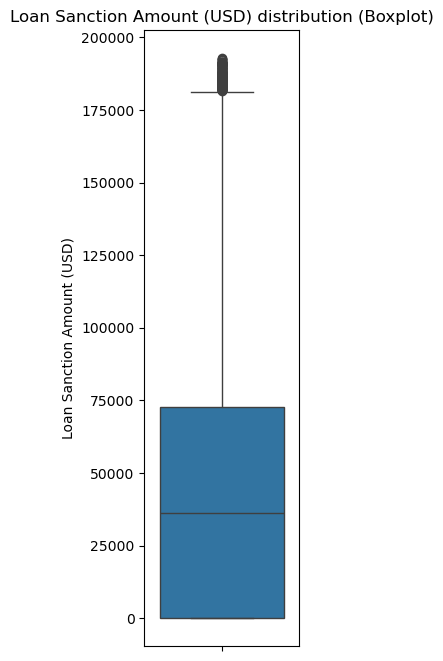

In [49]:
create_box_plot(df_train, 'Loan Sanction Amount (USD)')

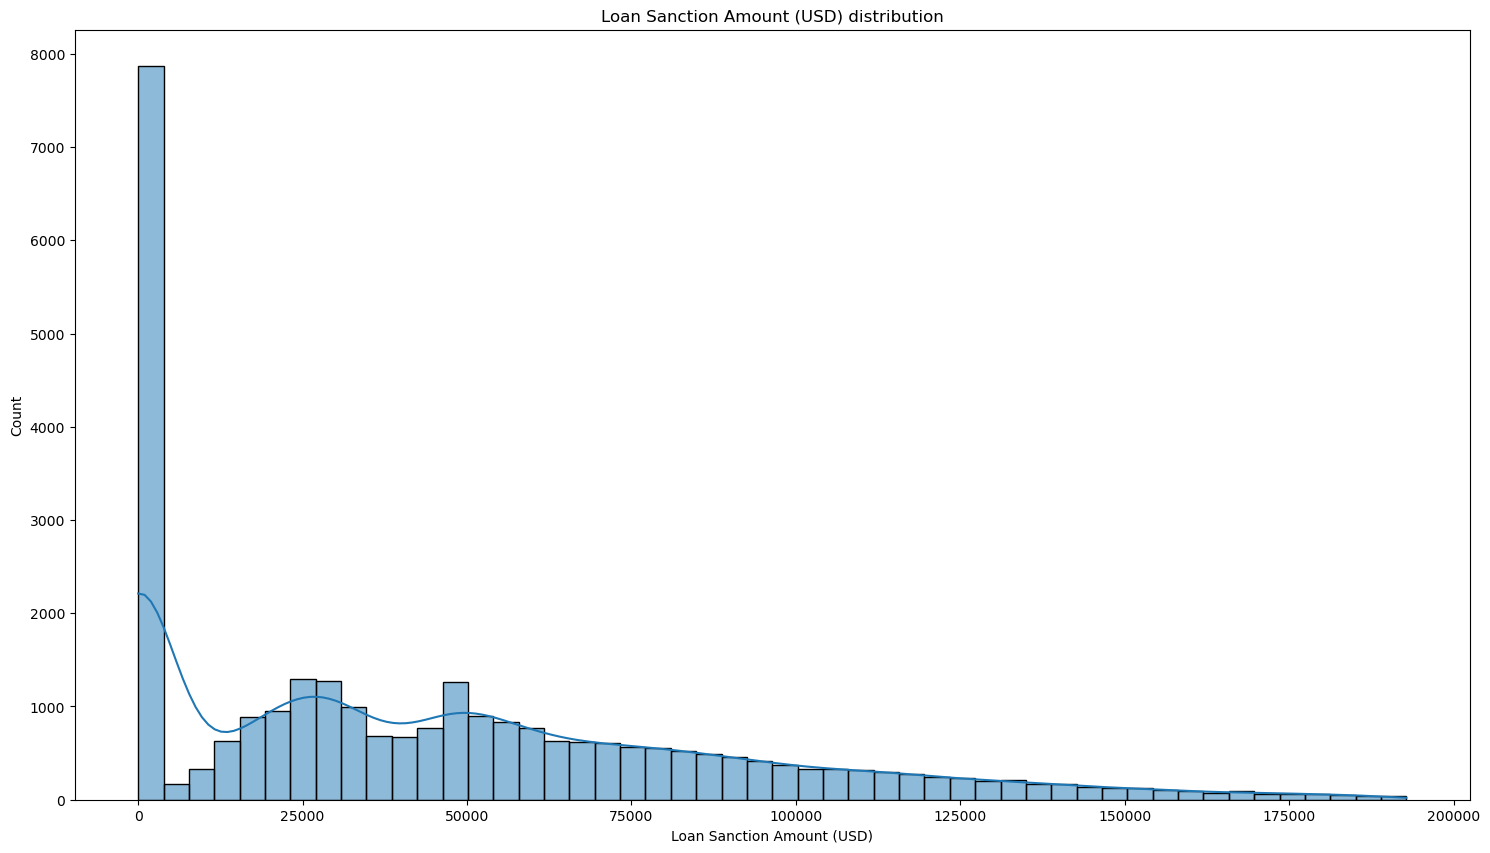

In [50]:
create_hist_plot(df_train, 'Loan Sanction Amount (USD)')

Interpretation:

1. The median loan sanction amount is $45503.068
2. The distribution of the loan sanction amount is skewed to the right

# 2. Multivariate Analysis - 

Here we focus on examining and interpreting multiple variables at a time

#### Correlation Analysis

We plot a heatmap to visually see the correlation between mutliple variables. It helps identify patterns of association. We get to know which features strongly influence the other.

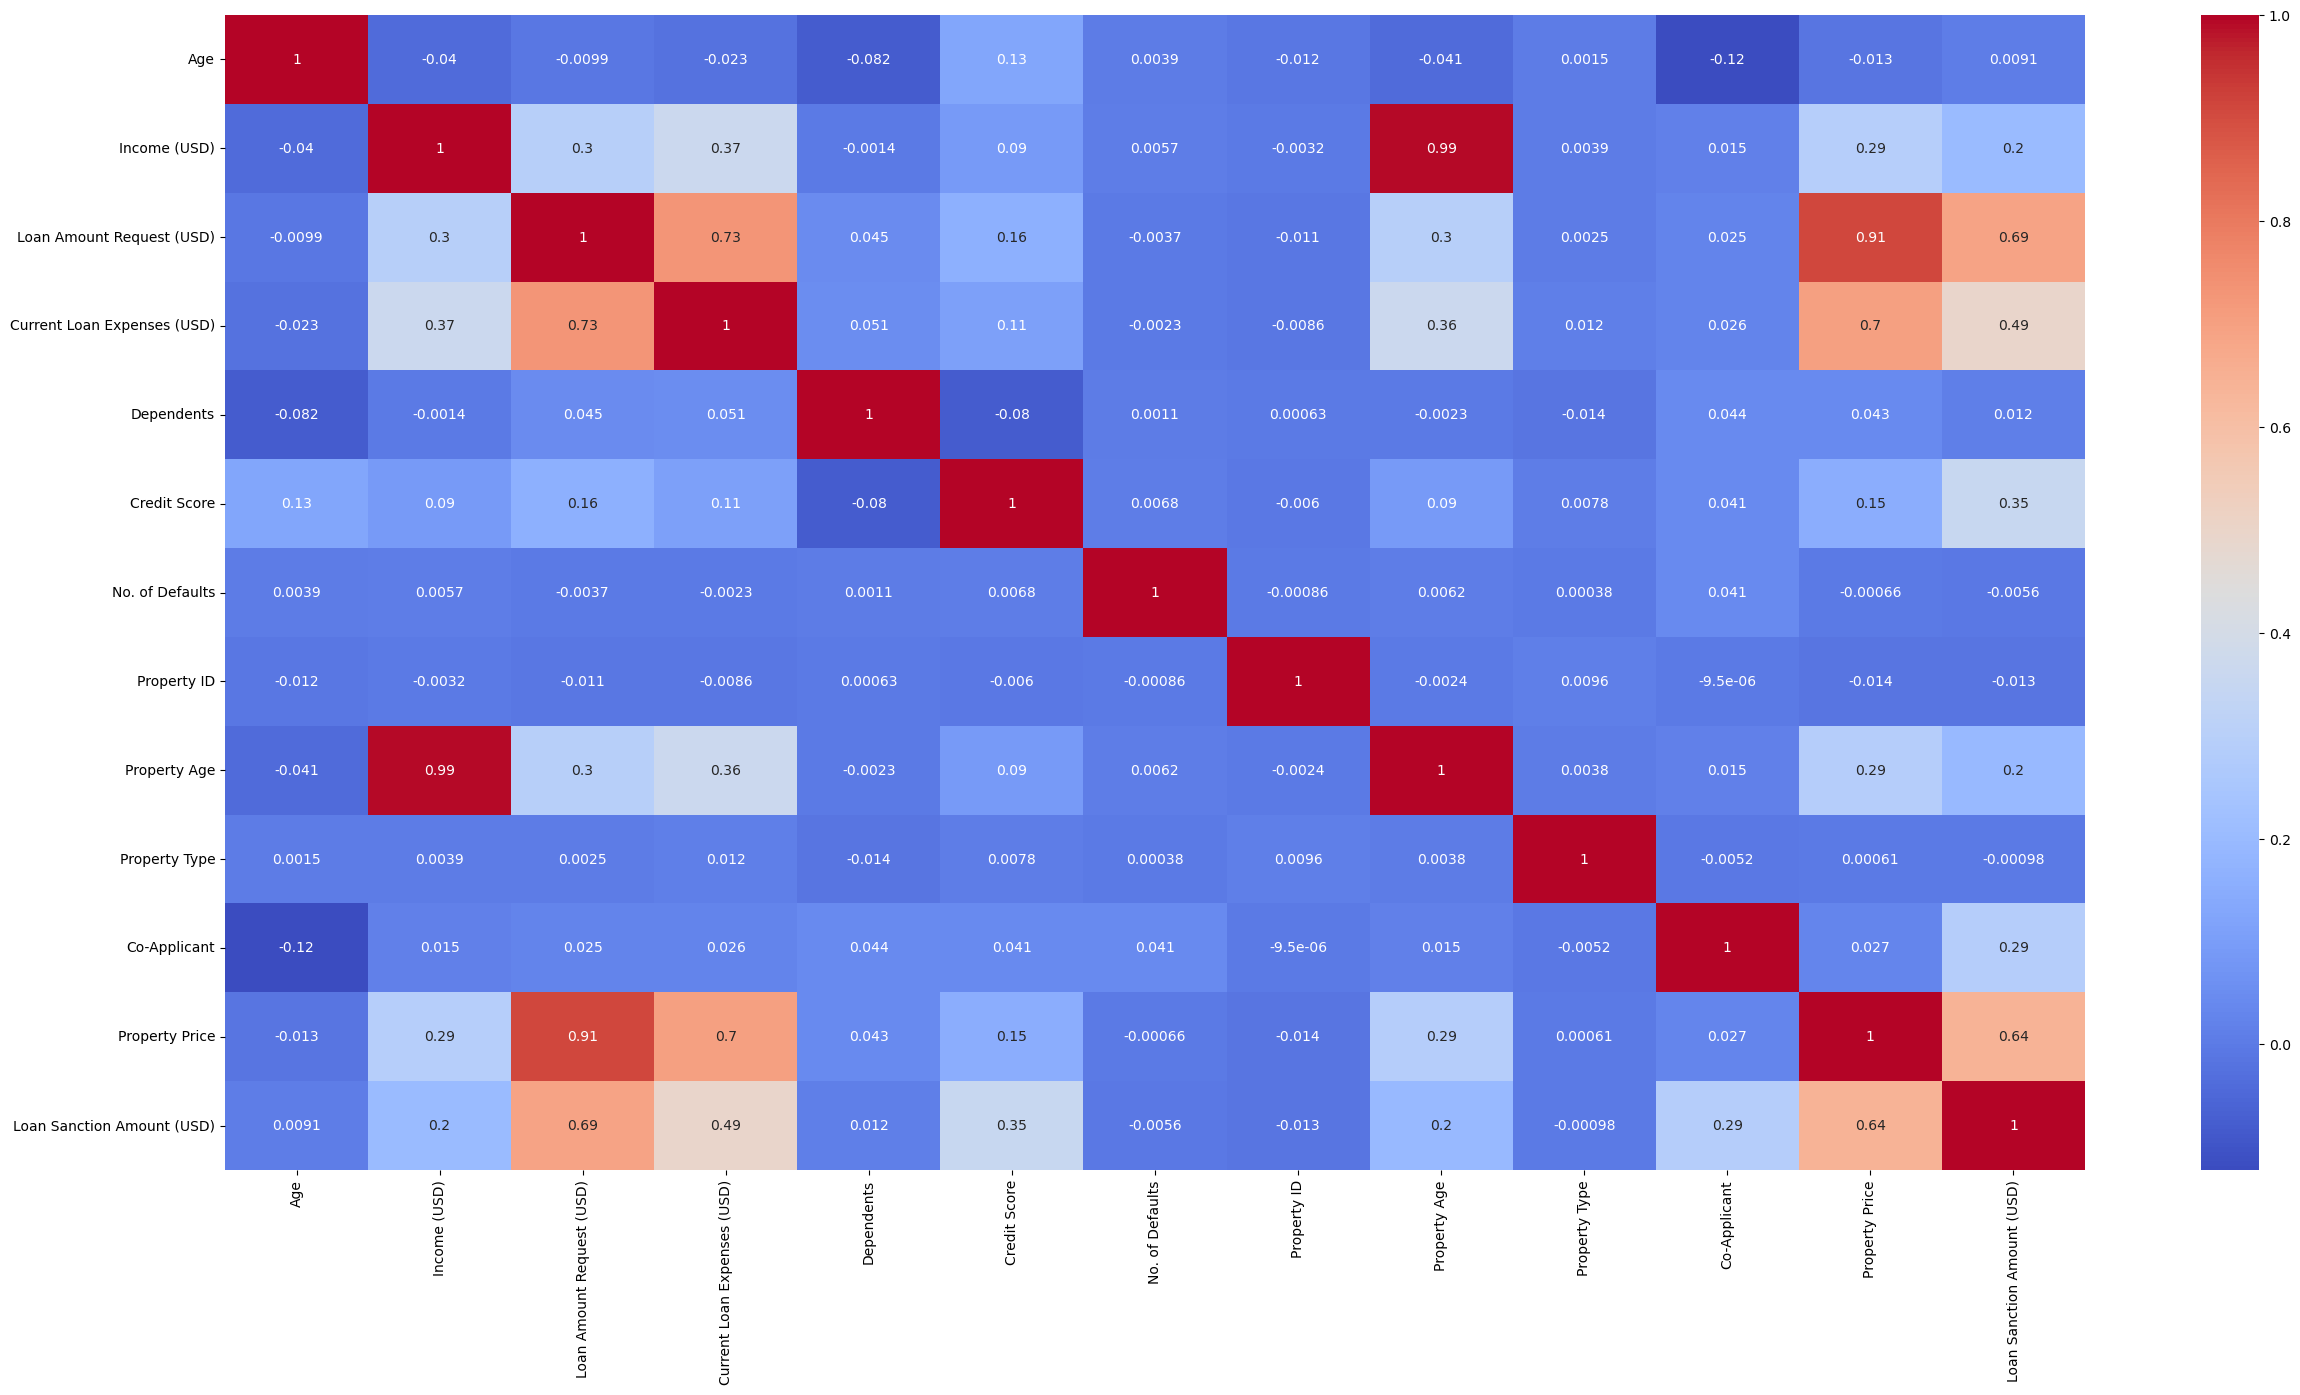

In [51]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_train.corr(numeric_only = True), annot = True, cmap = "coolwarm")
plt.show()

From the above heatmap we can make the following assumptions - 

* Income is highly correlated with Property Age ~ 99%
* Loan Amount Requested is highly correlated with Property Price ~ 90%
* Loan Amount Requested is decently correlated with Current Loan Expenses ~ 72%
* Current Loan Expenses is decently correlated with Property Price ~ 69%
* Loan Amount Requested (USD) is directly correlated with the Loan Sanction Amount (USD)

With the above information we can further check the correlations between bi-variables using a scatter plot

#### Income vs Property Age

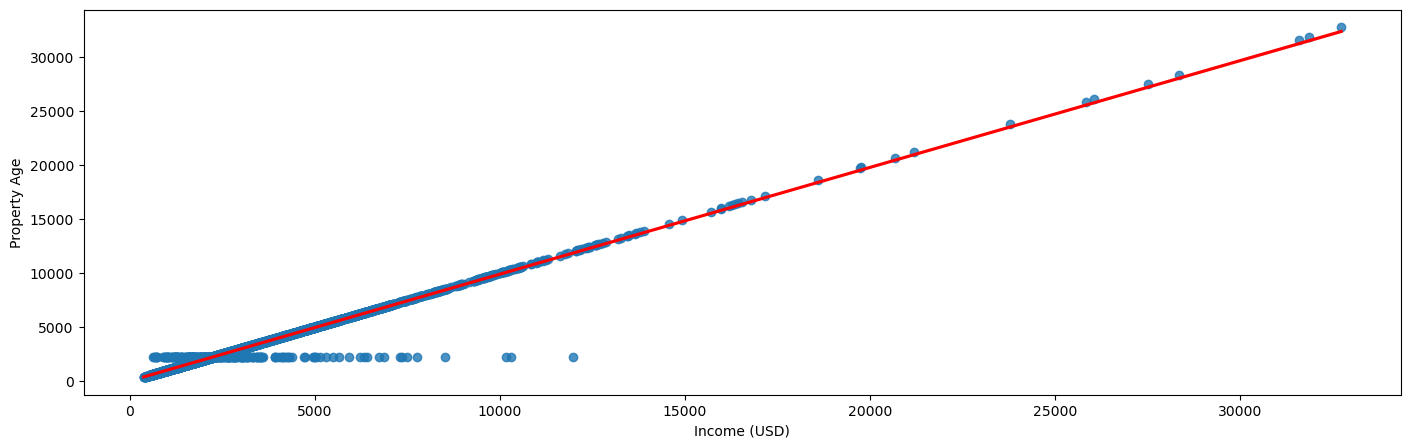

In [52]:
plt.figure(figsize=(17, 5))
sns.regplot(x='Income (USD)',y='Property Age',data=df_train,line_kws={'color':'red'})
plt.show()

We can see that more the property's age, the higher the income. A very good correlation between the two.

We can say that high income people like to stay in older property's

#### Loan Amount Requested vs Property Price

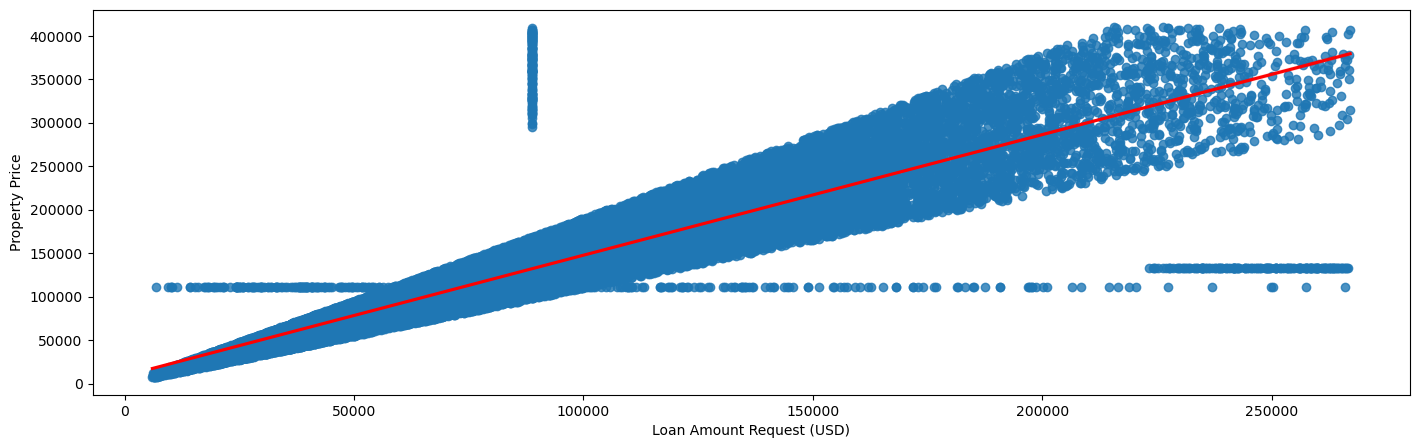

In [53]:
plt.figure(figsize=(17, 5))
sns.regplot(x = 'Loan Amount Request (USD)',y = 'Property Price', data = df_train, line_kws = {'color':'red'})
plt.show()

We can see a very high correlation between the property price and loan amount requested. Safe to assume the more expensive a property is the higher the amount of loan is required to purchase it

#### Loan Amount Requested vs Loan Sanction Amount

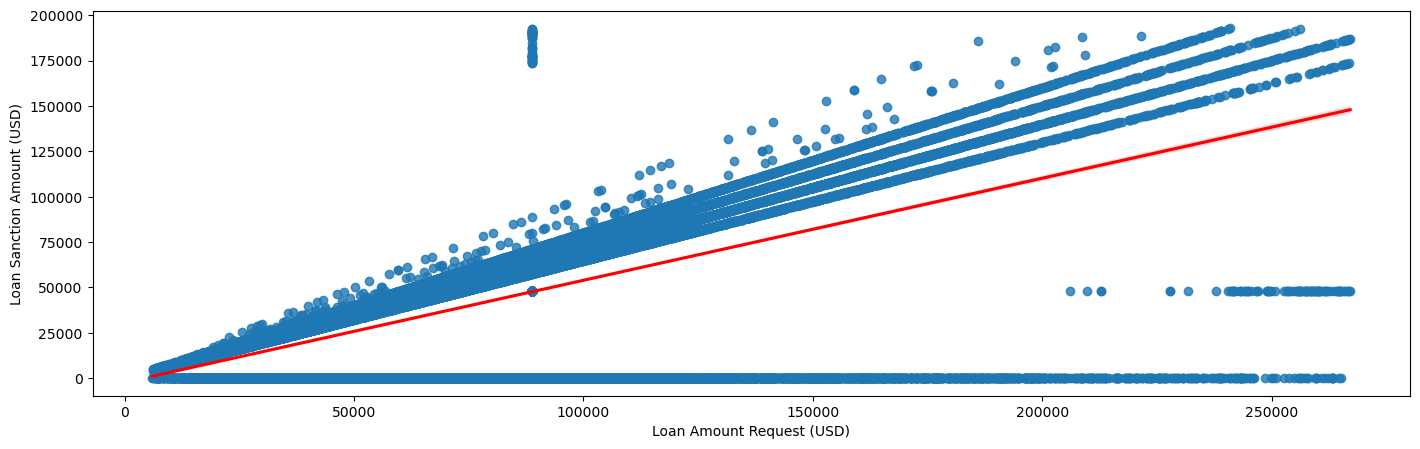

In [54]:
plt.figure(figsize=(17, 5))
sns.regplot(x = 'Loan Amount Request (USD)',y = 'Loan Sanction Amount (USD)', data = df_train, line_kws = {'color':'red'})
plt.show()

Similarly, the loan amount requested increases with the loan sanctioned amount. Higher the loan amount you ask for, the more likely you will be able to receive a large sum from the bank

We can view multiple scatter plots for each pair of features using the sns.pairplot function -

<Figure size 3000x1500 with 0 Axes>

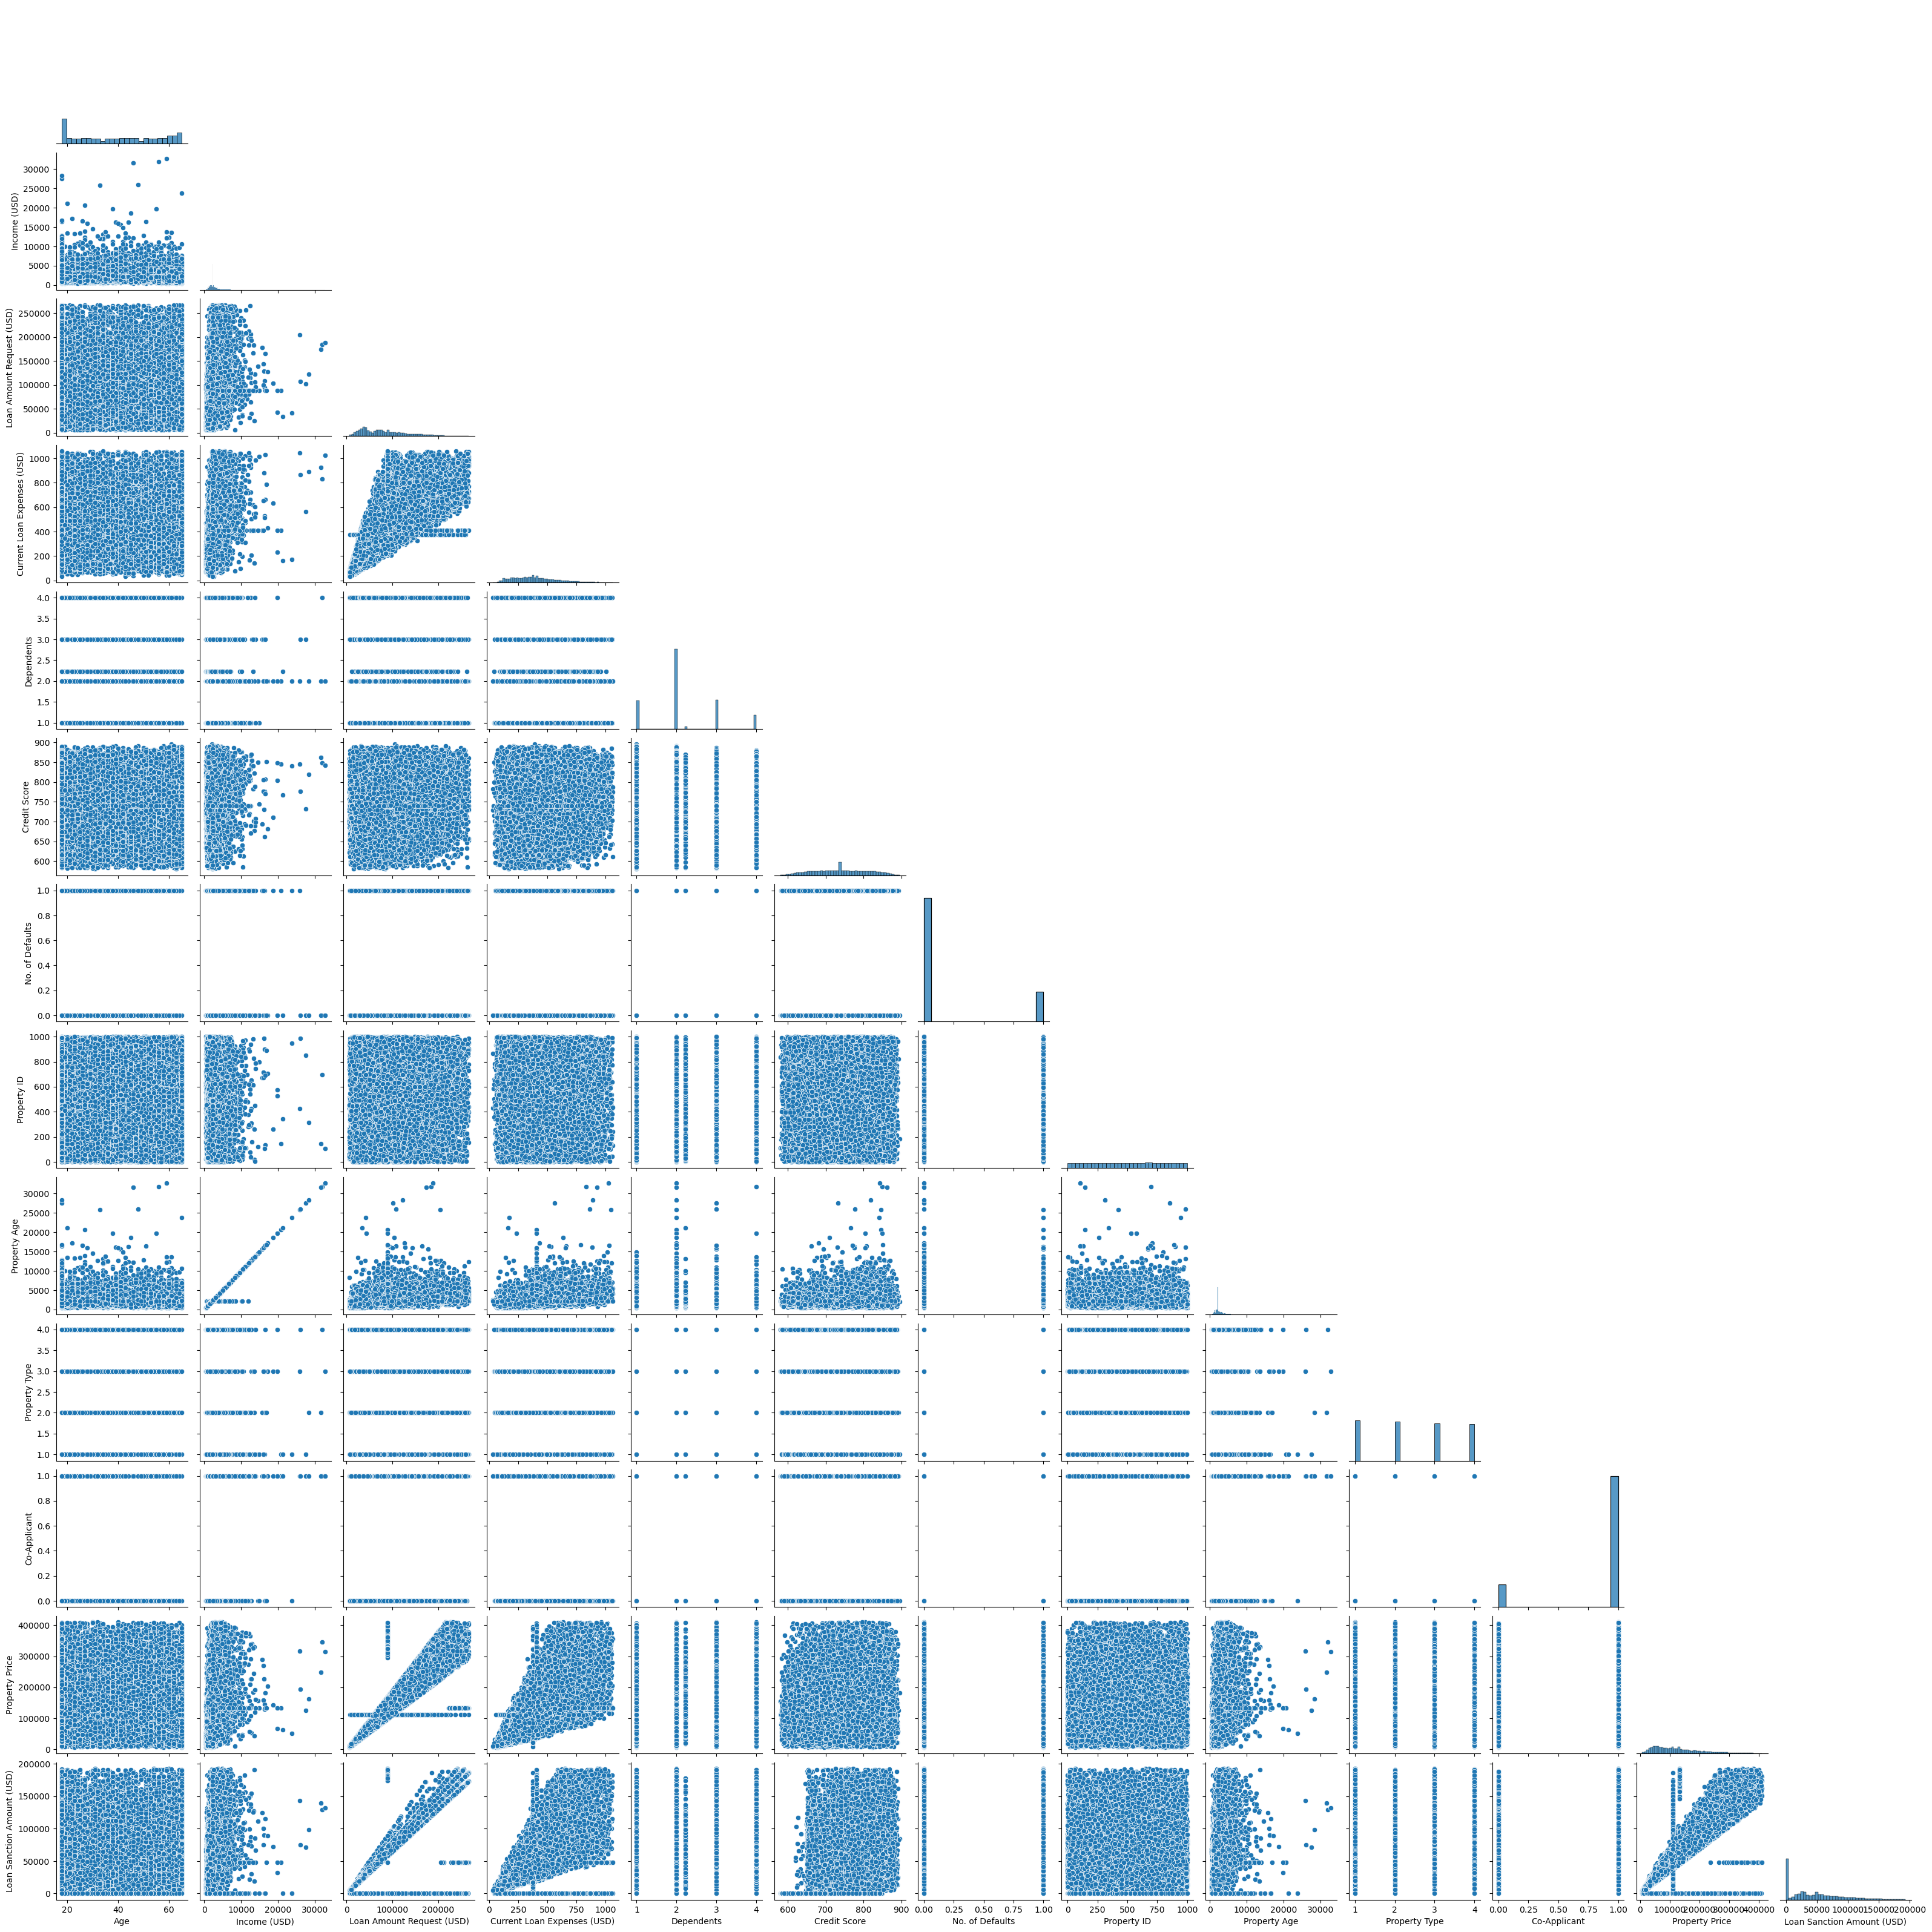

In [55]:
plt.figure(figsize=(30, 15))
sns.pairplot(df_train, corner=True)
plt.show()

### Feature Removal

In [56]:
df_processed = df_train.copy()

In [57]:
df_processed = df_processed[df_processed['Loan Sanction Amount (USD)']!=0]

In [58]:
df_processed.head(5)

Name Gender   Age  Income (USD) Income Stability  \
Customer ID                                                                  
C-36995       Frederica Shealy      F  56.0       1933.05              Low   
C-33999      America Calderone      M  32.0       4952.91              Low   
C-3770           Rosetta Verne      F  65.0        988.19             High   
C-26480             Zoe Chitty      F  65.0       2222.86             High   
C-23459           Afton Venema      F  31.0       2614.77              Low   

            Profession     Type of Employment    Location  \
Customer ID                                                 
C-36995        Working            Sales staff  Semi-Urban   
C-33999        Working               Laborers  Semi-Urban   
C-3770       Pensioner               Laborers  Semi-Urban   
C-26480      Pensioner               Laborers       Rural   
C-23459        Working  High skill tech staff  Semi-Urban   

             Loan Amount Request (USD)  Current Loan Expenses (USD)  ...  \
Customer ID                                                          ...   
C-36995                       72809.58                       241.08  ...   
C-33999                       46837.47                       495.81  ...   
C-3770                        45593.04                       171.95  ...   
C-26480                       80057.92                       298.54  ...   
C-23459                      113858.89                       491.41  ...   

            Credit Score No. of Defaults  Has Active Credit Card  Property ID  \
Customer ID                                                                     
C-36995           809.44             0.0                  Active          746   
C-33999           780.40             0.0             Unpossessed          608   
C-3770            833.15             0.0             Unpossessed          546   
C-26480           832.70             1.0             Unpossessed          890   
C-23459           745.55             1.0                  Active          715   

             Property Age Property Type  Property Location  Co-Applicant  \
Customer ID                                                                
C-36995           1933.05             4              Rural           1.0   
C-33999           4952.91             2              Rural           1.0   
C-3770             988.19             2              Urban           0.0   
C-26480           2223.61             2         Semi-Urban           1.0   
C-23459           2614.77             4         Semi-Urban           1.0   

             Property Price Loan Sanction Amount (USD)  
Customer ID                                             
C-36995           119933.46                   54607.18  
C-33999            54791.00                   37469.98  
C-3770             72440.58                   36474.43  
C-26480           121441.51                   56040.54  
C-23459           208567.91                   74008.28  

[5 rows x 23 columns]

In [59]:
df_processed.reset_index(inplace=True)

In [60]:
df_processed.head(5)

Customer ID               Name Gender   Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F  56.0       1933.05              Low   
1     C-33999  America Calderone      M  32.0       4952.91              Low   
2      C-3770      Rosetta Verne      F  65.0        988.19             High   
3     C-26480         Zoe Chitty      F  65.0       2222.86             High   
4     C-23459       Afton Venema      F  31.0       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working               Laborers  Semi-Urban                   46837.47   
2  Pensioner               Laborers  Semi-Urban                   45593.04   
3  Pensioner               Laborers       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0  ...        809.44             0.0                 Active          746   
1  ...        780.40             0.0            Unpossessed          608   
2  ...        833.15             0.0            Unpossessed          546   
3  ...        832.70             1.0            Unpossessed          890   
4  ...        745.55             1.0                 Active          715   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural           1.0   
1       4952.91              2             Rural           1.0   
2        988.19              2             Urban           0.0   
3       2223.61              2        Semi-Urban           1.0   
4       2614.77              4        Semi-Urban           1.0   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28  

[5 rows x 24 columns]

In [61]:
drop_features = ['Customer ID','Name','Type of Employment','Property ID']
df_processed.drop(drop_features, axis=1, inplace=True)

In [62]:
df_processed.head(5)

Gender   Age  Income (USD) Income Stability Profession    Location  \
0      F  56.0       1933.05              Low    Working  Semi-Urban   
1      M  32.0       4952.91              Low    Working  Semi-Urban   
2      F  65.0        988.19             High  Pensioner  Semi-Urban   
3      F  65.0       2222.86             High  Pensioner       Rural   
4      F  31.0       2614.77              Low    Working  Semi-Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                   72809.58                       241.08              N   
1                   46837.47                       495.81              N   
2                   45593.04                       171.95              N   
3                   80057.92                       298.54              N   
4                  113858.89                       491.41              N   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N         3.0        809.44              0.0   
1              Y         1.0        780.40              0.0   
2              Y         1.0        833.15              0.0   
3              Y         2.0        832.70              1.0   
4              Y         2.0        745.55              1.0   

  Has Active Credit Card  Property Age  Property Type Property Location  \
0                 Active       1933.05              4             Rural   
1            Unpossessed       4952.91              2             Rural   
2            Unpossessed        988.19              2             Urban   
3            Unpossessed       2223.61              2        Semi-Urban   
4                 Active       2614.77              4        Semi-Urban   

   Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0           1.0       119933.46                    54607.18  
1           1.0        54791.00                    37469.98  
2           0.0        72440.58                    36474.43  
3           1.0       121441.51                    56040.54  
4           1.0       208567.91                    74008.28

In [63]:
df_pca = df_processed.copy()

In [64]:
from scipy.stats import skew

def compute_skewness(df):
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Compute skewness for each numerical column
    skew_values = {col: skew(df[col].dropna()) for col in numerical_cols}
    
    # Convert to DataFrame for better readability
    skew_df = pd.DataFrame(list(skew_values.items()), columns=['Column', 'Skewness'])
    skew_df.sort_values(by='Skewness', ascending=False, inplace=True)
    
    return skew_df
 
 # Get skewness values for each column
skew_df = compute_skewness(df_processed)
print(skew_df)

                         Column  Skewness
7                  Property Age  4.908993
1                  Income (USD)  4.838973
6               No. of Defaults  1.550198
10               Property Price  0.938074
11   Loan Sanction Amount (USD)  0.901030
2     Loan Amount Request (USD)  0.863770
3   Current Loan Expenses (USD)  0.704569
4                    Dependents  0.590388
5                  Credit Score  0.146079
8                 Property Type  0.052232
0                           Age  0.032090
9                  Co-Applicant -4.156368


In [65]:
import numpy as np

# Columns with skewness to handle
columns_to_transform = ['Property Age', 'Income (USD)', 'No. of Defaults']

# Log Transformation
df_processed['Property Age'] = np.log1p(df_processed['Property Age'])  
df_processed['Income (USD)'] = np.log1p(df_processed['Income (USD)'])

# Square Root Transformation for moderate skewness
df_processed['No. of Defaults'] = np.sqrt(df_processed['No. of Defaults'])

In [66]:
df_processed.head(5)

Gender   Age  Income (USD) Income Stability Profession    Location  \
0      F  56.0      7.567372              Low    Working  Semi-Urban   
1      M  32.0      8.507932              Low    Working  Semi-Urban   
2      F  65.0      6.896886             High  Pensioner  Semi-Urban   
3      F  65.0      7.707000             High  Pensioner       Rural   
4      F  31.0      7.869314              Low    Working  Semi-Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                   72809.58                       241.08              N   
1                   46837.47                       495.81              N   
2                   45593.04                       171.95              N   
3                   80057.92                       298.54              N   
4                  113858.89                       491.41              N   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N         3.0        809.44              0.0   
1              Y         1.0        780.40              0.0   
2              Y         1.0        833.15              0.0   
3              Y         2.0        832.70              1.0   
4              Y         2.0        745.55              1.0   

  Has Active Credit Card  Property Age  Property Type Property Location  \
0                 Active      7.567372              4             Rural   
1            Unpossessed      8.507932              2             Rural   
2            Unpossessed      6.896886              2             Urban   
3            Unpossessed      7.707337              2        Semi-Urban   
4                 Active      7.869314              4        Semi-Urban   

   Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0           1.0       119933.46                    54607.18  
1           1.0        54791.00                    37469.98  
2           0.0        72440.58                    36474.43  
3           1.0       121441.51                    56040.54  
4           1.0       208567.91                    74008.28

In [67]:
from sklearn.preprocessing import LabelEncoder

categorical = ['Gender', 'Profession', 'Location', 'Expense Type 1', 
               'Expense Type 2', 'Has Active Credit Card', 
               'Property Location', 'Income Stability']

le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical:
    df_processed[col] = le.fit_transform(df_processed[col])

In [68]:
df_processed.head(5)

Gender   Age  Income (USD)  Income Stability  Profession  Location  \
0       0  56.0      7.567372                 1           6         1   
1       1  32.0      8.507932                 1           6         1   
2       0  65.0      6.896886                 0           3         1   
3       0  65.0      7.707000                 0           3         0   
4       0  31.0      7.869314                 1           6         1   

   Loan Amount Request (USD)  Current Loan Expenses (USD)  Expense Type 1  \
0                   72809.58                       241.08               0   
1                   46837.47                       495.81               0   
2                   45593.04                       171.95               0   
3                   80057.92                       298.54               0   
4                  113858.89                       491.41               0   

   Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0               0         3.0        809.44              0.0   
1               1         1.0        780.40              0.0   
2               1         1.0        833.15              0.0   
3               1         2.0        832.70              1.0   
4               1         2.0        745.55              1.0   

   Has Active Credit Card  Property Age  Property Type  Property Location  \
0                       0      7.567372              4                  0   
1                       2      8.507932              2                  0   
2                       2      6.896886              2                  2   
3                       2      7.707337              2                  1   
4                       0      7.869314              4                  1   

   Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0           1.0       119933.46                    54607.18  
1           1.0        54791.00                    37469.98  
2           0.0        72440.58                    36474.43  
3           1.0       121441.51                    56040.54  
4           1.0       208567.91                    74008.28

In [69]:
#### Preprocessing #####

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


X, y = df_processed.iloc[:, :-1], df_processed.iloc[:, -1]


y = y.values.reshape(-1, 1)


scaler_X = StandardScaler()
scaler_Y = StandardScaler()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)  

y_train_scaled = scaler_Y.fit_transform(y_train)
y_val_scaled = scaler_Y.transform(y_val)
y_test_scaled = scaler_Y.transform(y_test)  

#### Model: Gradient Boosting 

Gradient Boosting is a powerful ensemble learning algorithm that builds a predictive model by combining weak learners sequentially. Each subsequent model corrects the errors of the previous one, leading to high accuracy and robust predictions. It is well-suited for tabular datasets like this one, as it can capture complex patterns and interactions among features without requiring extensive feature engineering.

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, root_mean_squared_error
import numpy as np


gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', None]
}


def rmse_scaled(y, y_pred):
    # Inverse transform y_pred to the original scale
    y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))
    y_true_original = scaler_Y.inverse_transform(y.reshape(-1, 1))
    
    return root_mean_squared_error(y_true_original, y_pred_original)


rmse_scorer = make_scorer(rmse_scaled, greater_is_better=False)


grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring=rmse_scorer,  
    cv=5,
    verbose=2,
    n_jobs=-1
)


grid_search.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', None],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring=make_scorer(rmse_scaled, greater_is_better=False, response_method='predict'),
             verbose=2)

#### Best Model Parameters
After hyperparameter tuning, the following parameters were determined to yield the best performance:
- **Learning Rate:** 0.05
- **Max Depth:** 5
- **Max Features:** None
- **Number of Estimators:** 100
- **Subsample:** 0.8

These parameters strike a balance between underfitting and overfitting, ensuring the model generalizes well to unseen data.

In [71]:
from sklearn.metrics import r2_score

# Get the best model
best_model = grid_search.best_estimator_

# Preeict on test set
y_pred_scaled = best_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Calculate the RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best parameter values: {grid_search.best_params_}")
print(f"RMSE using best model: {rmse:.2f}")
print(f"R² score: {r2}")

Best parameter values: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': None, 'n_estimators': 100, 'subsample': 0.8}
RMSE using best model: 9094.17
R² score: 0.949004163564591


#### Performance Metrics
- **Root Mean Squared Error (RMSE):** 9094.17  
The RMSE value of 9094.17 is relatively low considering the range of loan sanction amounts in the dataset. This suggests that the Gradient Boosting model is performing well, providing predictions that are reasonably close to actual values on average.

- **R² Score:** 0.9490
  The R² score suggests that approximately 94.90% of the variance in the loan sanction amount is explained by the model. This demonstrates a strong fit of the model to the data.

In [72]:
residuals = y_test - y_pred
residuals

array([[-4666.05567337],
       [  695.83094294],
       [-3569.06878059],
       ...,
       [-1181.05041914],
       [ 3811.60834996],
       [ -715.92348592]])

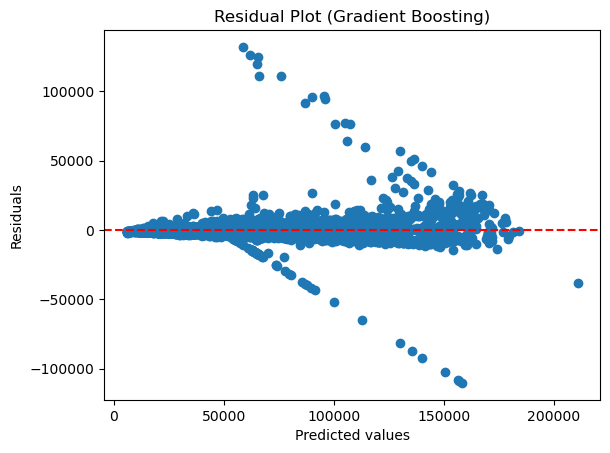

In [73]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Gradient Boosting)")
plt.show()

#### Key Observations:
1. **Strengths:**
   - Residuals are reasonably distributed around the red dashed line, indicating good overall predictive performance.
   - Higher predicted values show fewer extreme deviations, demonstrating the model captures general trends well.

2. **Areas for Improvement:**
   - **Non-Uniform Spread:** A funnel shape for lower predicted values suggests **underprediction** for high actual values.
   - **Outliers:** Some extreme negative residuals (bottom-left) indicate the model struggles with specific cases, particularly underpredicting certain loans.
   - **Systematic Pattern:** Diagonal clustering in negative residuals hints that some feature interactions are not fully captured.

#### Implications:
- The model performs well overall, but issues like **heteroscedasticity** (increasing variance of residuals with higher predicted values) and occasional bias warrant further attention.
- Improvements could include feature engineering, addressing outliers, or exploring advanced models to better handle complex patterns.

This plot reflects a generally strong model with clear opportunities for refinement.

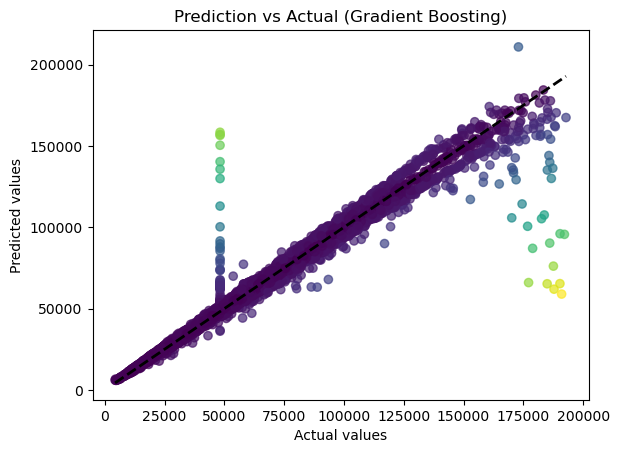

In [74]:
errors = abs(y_test - y_pred)
plt.scatter(y_test, y_pred, c=errors, cmap='viridis', alpha=0.7)
plt.plot([min(y_test), max(y_test)], 
         [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Prediction vs Actual (Gradient Boosting)")
plt.show()

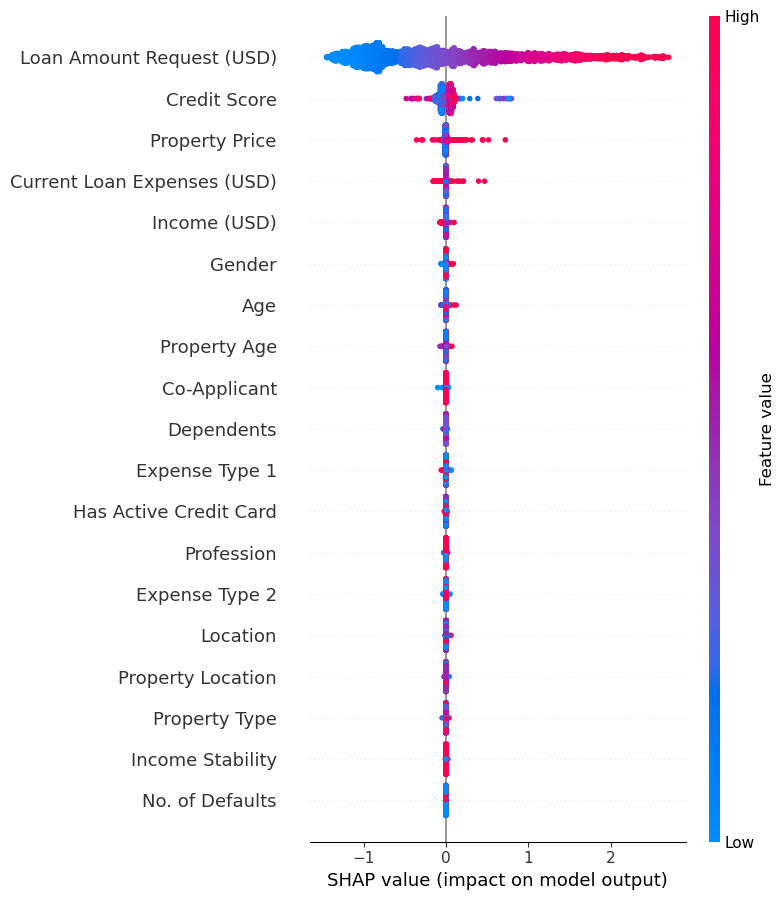

In [77]:
# SHAP summary plot
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, feature_names=X.columns)

### Explanation of SHAP Summary Plot

1. **Feature Importance**  
   - Features are ranked by their impact on the model's prediction (most important at the top).  
   - "Loan Amount Request (USD)" is the most impactful feature.

2. **SHAP Values (X-axis)**  
   - Negative SHAP values (left) reduce predictions, while positive values (right) increase them.  

3. **Insights**  
   - **"Loan Amount Request (USD)":** High values (red) increase predictions.  
   - **"Credit Score":** High scores (red) decrease predictions (e.g., reduced risk).  
   - Features like "Gender" or "Property Type" have minimal impact (values close to zero).

4. **Purpose**  
   - Highlights feature importance and how feature values influence predictions.


#### Model: Random Forest 

##### Random Forest is a popular ensemble learning algorithm used for classification and regression tasks. It combines the predictions of multiple decision trees to produce a more robust and accurate result. In real word data like loan dataset where the features have mostly a non-linear complex relationship, this model will help in making accurate financial decisions.

In [78]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [79]:
#Grid search CV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300],   
    'max_depth': [None, 10, 15],      
    'min_samples_split': [2, 5, 3],  
    'min_samples_leaf': [1, 2],    
    'max_features': ['log2', 'sqrt',None]  
}

model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5,  
    verbose=2,
    n_jobs=-1 
)

grid_search.fit(X_train_scaled, y_train_scaled.ravel())

best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Best parameter values: {best_params}")
print(f"MSE using best model: {best_mse:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameter values: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MSE using best model: 0.06


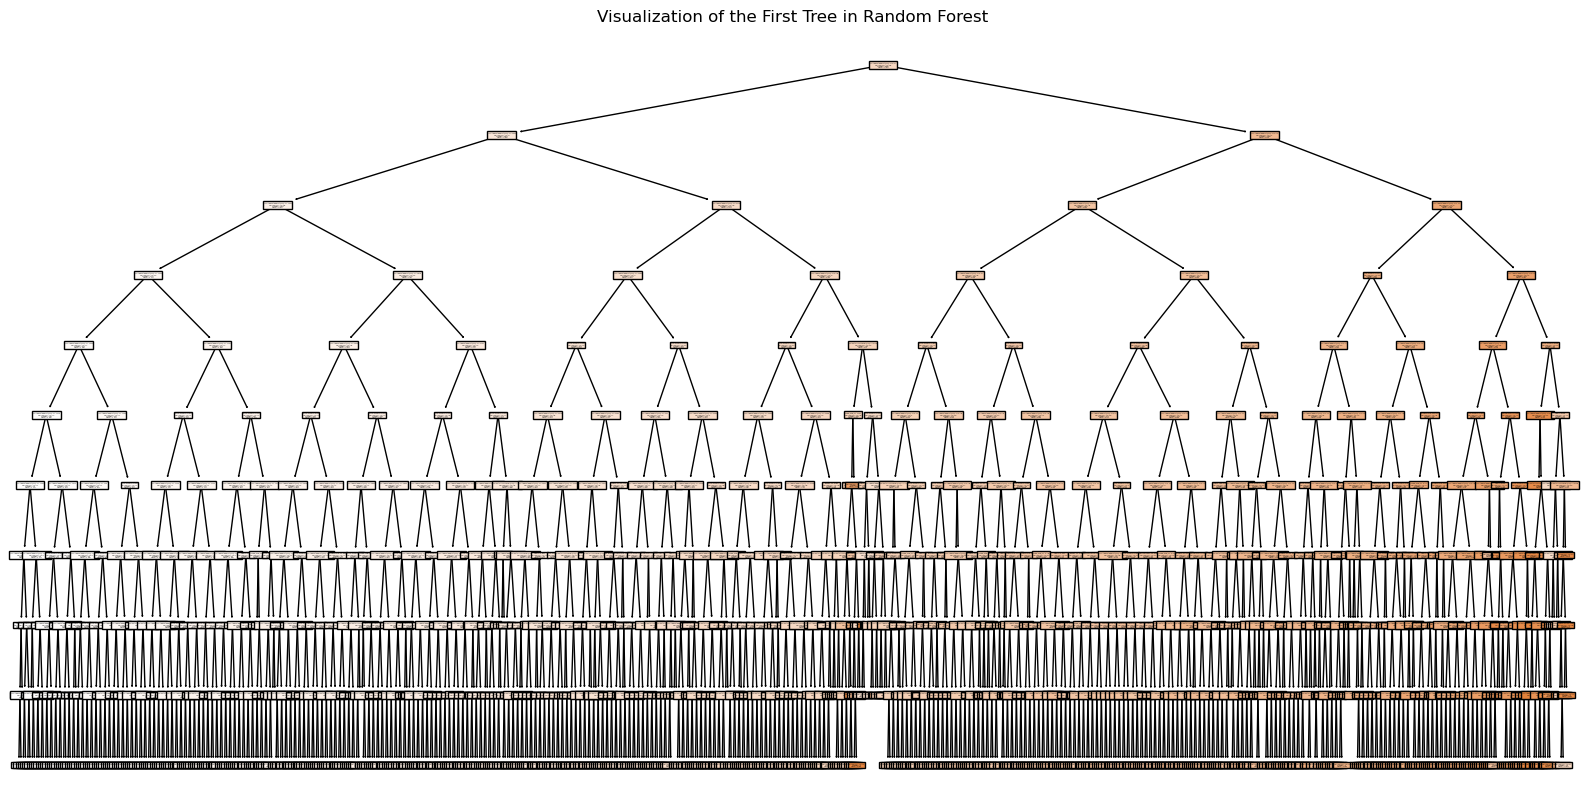

In [80]:
#Visualisation of a sample Tree
best_model = grid_search.best_estimator_
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['Regression'])
plt.title("Visualization of the First Tree in Random Forest")
plt.show()

Average MSE over 5 folds for entire training set: 0.06
Standard Deviation of MSE over 5 folds for entire training set: 0.01


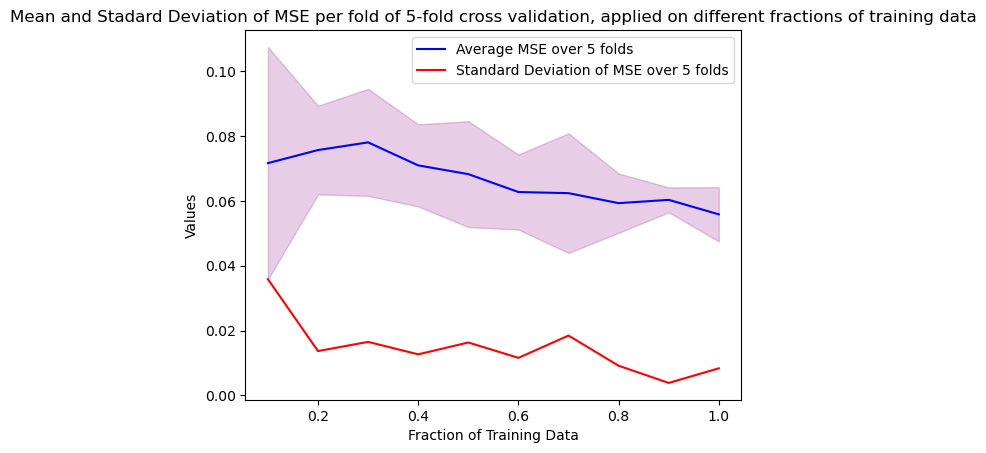

In [81]:
# Visualisation of Mean and Standard Deviations of MSE over 5 folds , for different fractions of training data/validation set
fractions = np.linspace(0.1, 1.0, 10)  
mean_values = []
std_values = []

# Calculate MSE for each train size
for train_size in fractions:
    # Fractioning the training data to the train_size
    fraction_X_train = X_train_scaled[:int(train_size * len(X_train))]
    fraction_y_train = y_train_scaled[:int(train_size * len(y_train))]

    # Performing cross-validation on the current fraction
    mse_values = cross_val_score(
        best_model, fraction_X_train, fraction_y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    # Calculating mean MSE for the training set and validation set
    mean_values.append(-mse_values.mean())  
    std_values.append(np.std(mse_values)) 


plt.plot(fractions, mean_values, label="Average MSE over 5 folds", color='blue')
plt.plot(fractions, std_values, label="Standard Deviation of MSE over 5 folds", color='red')
plt.fill_between(fractions, 
                 np.array(mean_values) - np.array(std_values),
                 np.array(mean_values) + np.array(std_values), color='blue', alpha=0.1)
plt.fill_between(fractions, 
                 np.array(mean_values) - np.array(std_values),
                 np.array(mean_values) + np.array(std_values), color='red', alpha=0.1)

print(f"Average MSE over 5 folds for entire training set: {mean_values[-1]:.2f}")
print(f"Standard Deviation of MSE over 5 folds for entire training set: {std_values[-1]:.2f}")

plt.xlabel("Fraction of Training Data")
plt.ylabel("Values")
plt.title("Mean and Stadard Deviation of MSE per fold of 5-fold cross validation, applied on different fractions of training data")
plt.legend()
plt.show()


##### Mean and Standard Deviation of MSE over 5 folds of cross validation, for different fractions of training data
Inference: 
- The average MSE and standard deviation of MSE values across 5 iterations of 5-fold validation, decreases as fraction of training data increases, indicating more the data, better the results. Also the low MSE values in each fold of 5-fold cross validation indicate that the model is not overfitting. 
- Average MSE over 5 folds for entire training set: 0.06
- Standard Deviation of MSE over 5 folds for entire training set: 0.01

In [82]:
# MSE on Test data
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
print(f"Mean Squared Error on test data: {mse:.2f}")

Mean Squared Error on test data: 0.05


In [83]:
# Calculate RMSE in original scale
y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))
y_original = pd.DataFrame(scaler_Y.inverse_transform(np.array(y_test_scaled).reshape(-1, 1)))

mse_original = root_mean_squared_error(y_original, y_pred_original)
r2 = r2_score(y_original, y_pred_original)
mae_original = mean_absolute_error(y_original,y_pred_original)
print(f"RMSE in Original Scale: {mse_original:.2f}")
print(f"Mean Absolute Error: {mae_original:.2f}")
print(f"R2 score: {r2:.2f}")

RMSE in Original Scale: 9104.04
Mean Absolute Error: 3830.48
R2 score: 0.95


#### Performance Metrics
- **Root Mean Squared Error (RMSE):** 9104.04 
- The RMSE value of 9104.04 USD is relatively low considering the range of loan sanction amounts in the dataset. This suggests that the Random Forest model is performing well, providing predictions that are reasonably close to actual values on average.
- **R² Score:** 0.95
  The R² score suggests that approximately 95 percent of the variance in the loan sanction amount is explained by the model. This demonstrates a strong fit of the model to the data.

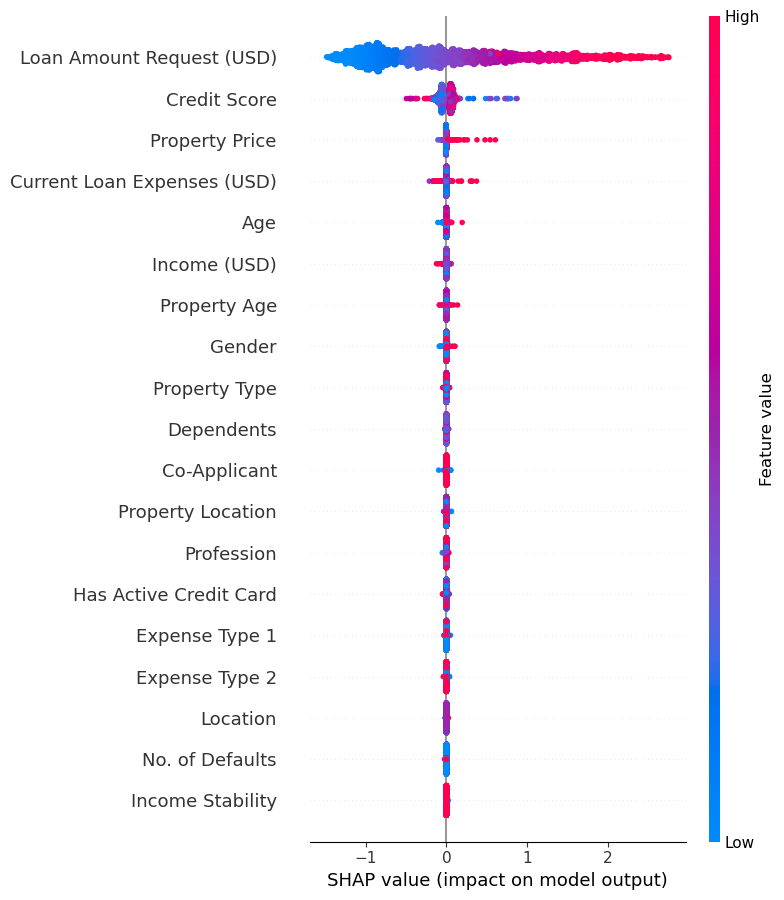

In [84]:
# SHAP Plot
# Initializing SHAP explainer with the best model
exp = shap.TreeExplainer(best_model)
# SHAP values for test set
shap_values = exp.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_train.columns)

##### SHAP Plot
**Inference**
- This SHAP plot provides a more detailed analysis of impact of each feature on the prediction outcome of the model. The x-axis represents the SHAP values, indicating how much each feature pushes the model's prediction positively (right) or negatively (left). The color code indicates what extremity (low or high) of each feature’s values impact the model positively or negatively.

 **Some notable inferences are**:

- High loan request amounts (red) have a strong positive impact on the model's prediction,  and implies that in most cases the requested amount is delivered.
- High credit score pushes the model to predict higher values of loan amount sanctioned, possibly reducing risk or increasing approval chances.
- High property prices pushes the model to predict higher loan amount sanctioned.
- High current loan expenses tends to negatively affect the outcome, whereas low current expenses impacts it positively.
- All other features are not contributing much to the outcome.

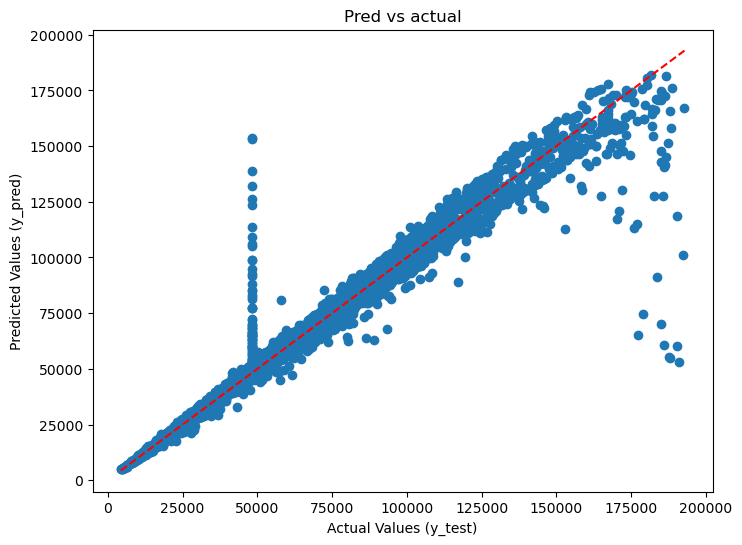

In [85]:
# Visualisation of Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_original,y_pred_original)
plt.plot([y_original.min(), y_original.max()], [y_original.min(), y_original.max()], color='red', linestyle='--', label='x = y')
plt.title("Pred vs actual")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.show()

##### Actual vs Predicted Values
- Inference: We can see that the majority of data points are being predicted accurately. Some values which are actually lesser in magnitude are wrongly predicted as high values. This might possibly be because of insufficient representation of these cases in the training dataset. This can be handled by collecting more data, in the real world scenario.
The incorrect values contribute heavily to the error because of the magnitude of the target variable.

#### Model: Linear Regression 

In [86]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [87]:
# Make predictions
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

y_pred_original = scaler_Y.inverse_transform(y_pred.reshape(-1, 1))

# Compute MSE in the original scale
mse_original = mean_squared_error(y_test, y_pred_original)

# Compute RMSE in the original scale
rmse_original = np.sqrt(mse_original)
print("RMSE in Original Scale:", rmse_original)

r2 = r2_score(y_test, y_pred_original)
print(f"R² score: {r2}")

Mean Squared Error: 0.08
RMSE in Original Scale: 11069.533678467384
R² score: 0.9244443021012541


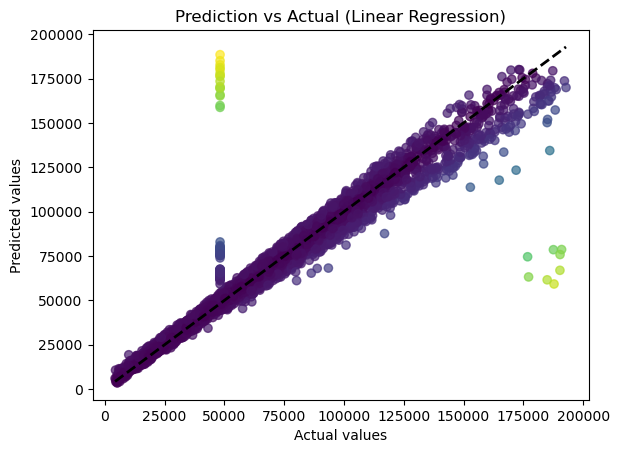

In [88]:
errors = abs(y_test - y_pred_original)
plt.scatter(y_test, y_pred_original, c=errors, cmap='viridis', alpha=0.7)
plt.plot([min(y_test), max(y_test)], 
         [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Prediction vs Actual (Linear Regression)")
plt.show()

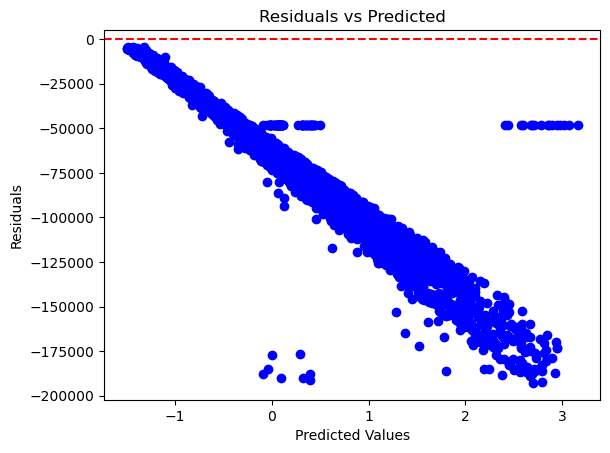

In [89]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_pred - y_test, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


Average MSE over 5 folds for entire training set: 0.08
Standard Deviation of MSE over 5 folds for entire training set: 0.01


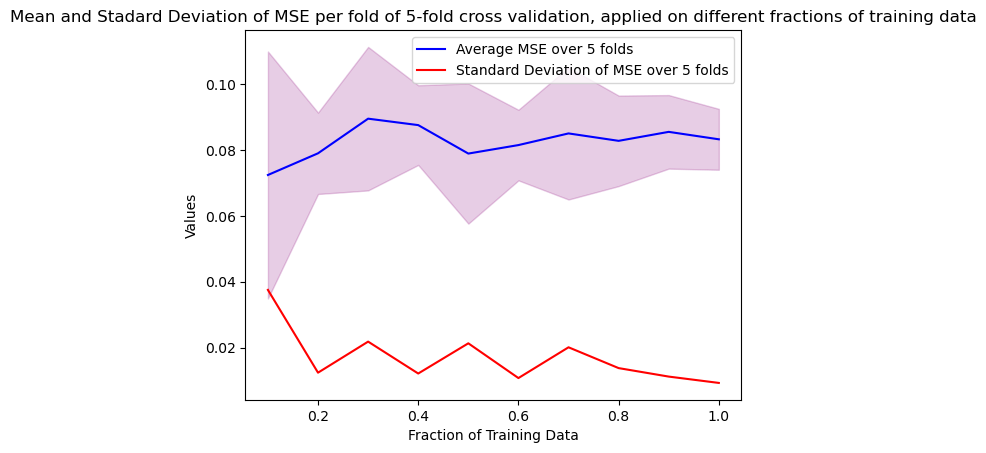

In [90]:
# Visualisation of Mean and Standard Deviations of MSE over 5 folds , for different fractions of training data/validation set
fractions = np.linspace(0.1, 1.0, 10)  
mean_values = []
std_values = []

# Calculate MSE for each train size
for train_size in fractions:
    # Fractioning the training data to the train_size
    fraction_X_train = X_train_scaled[:int(train_size * len(X_train))]
    fraction_y_train = y_train_scaled[:int(train_size * len(y_train))]

    # Performing cross-validation on the current fraction
    mse_values = cross_val_score(
        linear_model, fraction_X_train, fraction_y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    # Calculating mean MSE for the training set and validation set
    mean_values.append(-mse_values.mean())  
    std_values.append(np.std(mse_values)) 


plt.plot(fractions, mean_values, label="Average MSE over 5 folds", color='blue')
plt.plot(fractions, std_values, label="Standard Deviation of MSE over 5 folds", color='red')
plt.fill_between(fractions, 
                 np.array(mean_values) - np.array(std_values),
                 np.array(mean_values) + np.array(std_values), color='blue', alpha=0.1)
plt.fill_between(fractions, 
                 np.array(mean_values) - np.array(std_values),
                 np.array(mean_values) + np.array(std_values), color='red', alpha=0.1)

print(f"Average MSE over 5 folds for entire training set: {mean_values[-1]:.2f}")
print(f"Standard Deviation of MSE over 5 folds for entire training set: {std_values[-1]:.2f}")

plt.xlabel("Fraction of Training Data")
plt.ylabel("Values")
plt.title("Mean and Stadard Deviation of MSE per fold of 5-fold cross validation, applied on different fractions of training data")
plt.legend()
plt.show()

##### Model: PCA

##### PCA-based linear regression is a modeling approach that combines Principal Component Analysis (PCA) for dimensionality reduction with linear regression for predicting a target variable. This technique is especially useful when the dataset has many features (high dimensionality) or when the features are highly correlated (multicollinearity), as in our loan dataset.

In [91]:
categorical = ['Gender', 'Profession', 'Location', 'Expense Type 1', 
               'Expense Type 2', 'Has Active Credit Card', 
               'Property Location', 'Income Stability']

for col in categorical:
    df_pca[col] = le.fit_transform(df_pca[col])

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_pca, y_pca = df_pca.iloc[:, :-1], df_pca.iloc[:, -1]

y_pca = y_pca.values.reshape(-1, 1)


scaler_X_pca = StandardScaler()
scaler_Y_pca = StandardScaler()

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.2, random_state=42)

X_train_scaled_pca = scaler_X_pca.fit_transform(X_train_pca)
X_val_scaled_pca = scaler_X_pca.transform(X_val_pca)
X_test_scaled_pca = scaler_X_pca.transform(X_test_pca) 

y_train_scaled_pca = scaler_Y_pca.fit_transform(y_train_pca)
y_val_scaled_pca = scaler_Y_pca.transform(y_val_pca)
y_test_scaled_pca = scaler_Y_pca.transform(y_test_pca) 

X_train_pca_trans = pca.fit_transform(X_train_scaled_pca)
X_test_pca_trans = pca.transform(X_test_scaled_pca)

print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
print(f'Cumulative Explained Variance: {pca.explained_variance_ratio_.cumsum()}')

lr_model = LinearRegression()
lr_model.fit(X_train_pca_trans, y_train_scaled_pca)

y_pred_scaled_lr = lr_model.predict(X_test_pca_trans)
y_pred_scaled_lr_removed = scaler_Y.inverse_transform(y_pred_scaled_lr.reshape(-1, 1))

mse_original=mean_squared_error(y_test_pca, y_pred_scaled_lr_removed)

print(f'Mean Squared Error: {mean_squared_error(y_test_scaled_pca, y_pred_scaled_lr)}')
print(f'R^2 Score: {r2_score(y_test_pca, y_pred_scaled_lr_removed)}')

rmse_original = np.sqrt(mse_original)
print("RMSE in Original Scale:", rmse_original)

Explained Variance Ratio: [0.16925508 0.11507108 0.08119588 0.05742922 0.0543642  0.05408141
 0.05344761 0.05286383 0.05175152 0.05127374]
Cumulative Explained Variance: [0.16925508 0.28432615 0.36552204 0.42295126 0.47731546 0.53139688
 0.58484449 0.63770832 0.68945983 0.74073357]
Mean Squared Error: 0.13582655094912133
R^2 Score: 0.8678853983014869
RMSE in Original Scale: 14637.642131125358


##### Performance Metrics
- The high R² score indicates the model captures most of the variation in the target variable.
The model likely benefits from the dimensionality reduction via PCA, as it avoids overfitting to irrelevant features.

- The high MSE is likely because the magnitude of the target variables are huge and compared to other models, this PCA linear regression model is not able to make as many accurate predictions as other models.


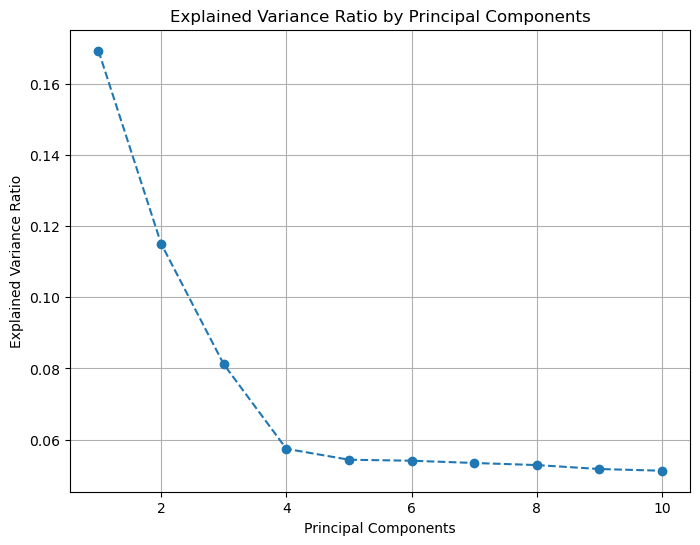

In [93]:
# Plot Explained Variance Ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

##### Explained Variance Ratio by Principal Components

- Steep Decline in Variance: The first few principal components explain the majority of the variance in the dataset. Specifically, the first component explains about 16%, and the second adds another ~12%.
- After the 4th component, the explained variance plateaus, with subsequent components contributing only marginally.
- The "elbow" in the curve which is around 3–4 components suggests the optimal number of components for capturing most of the variance without including unnecessary dimensions.
- This tells us that instead of keeping all 10 components, 3–4 components might suffice to retain the most meaningful information.


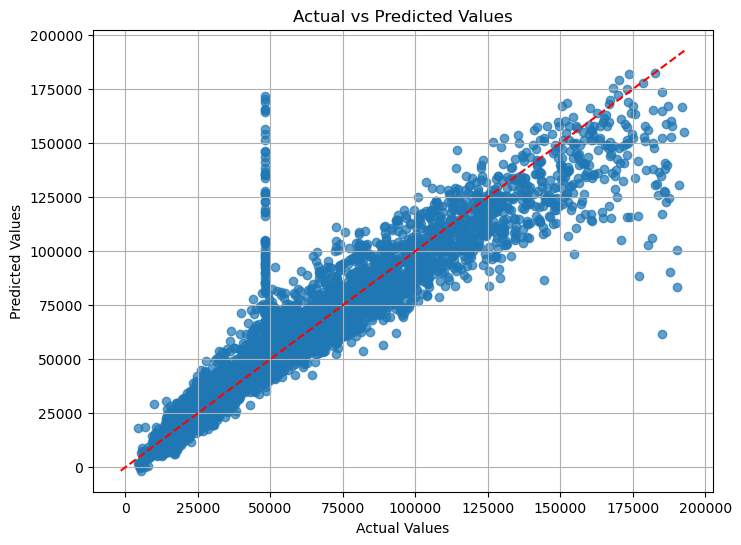

In [94]:
# Plot Actual vs Predicted
y_pred_scaled_lr_removed = scaler_Y.inverse_transform(y_pred_scaled_lr.reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pca, y_pred_scaled_lr_removed, alpha=0.7)
min_val = min(y_test_pca.min(), y_pred_scaled_lr_removed.min())
max_val = max(y_test_pca.max(), y_pred_scaled_lr_removed.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


##### Actual vs Predicted values
- The predicted values are mostly close to the actual values, with few exceptions with major difference, which is likely contributing to the high Mean Squared Error value, despite a good R^2 score.


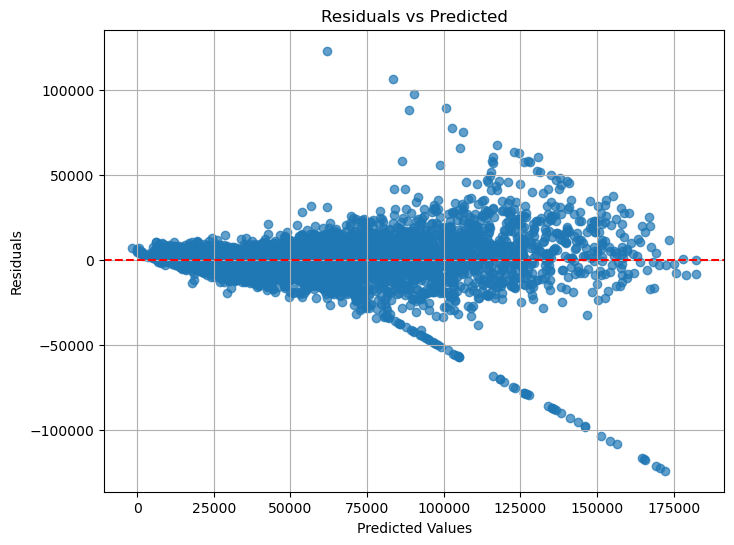

In [95]:
# Plot Residuals
residuals = y_test_pca - y_pred_scaled_lr_removed
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_scaled_lr_removed, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

##### Residual vs Predicted Values
- The residuals (differences between actual and predicted values) are not uniformly scattered around the red line (zero residual). A noticeable funnel shape is visible, with the variance of residuals increasing as predicted values increase. 
- The spread of residuals is not constant across all predicted values, indicating heteroscedasticity. This violates a key assumption of linear regression, which assumes homoscedasticity. 
- For lower predicted values, the residuals are mostly negative ie, model tends to overpredict. For higher predicted values, residuals show both large positive and negative errors ie, model struggles with extreme values.
- Hence despite PCA because of the non linear nature of data probably, the PCA based linear regression model is not highly effective.


#### Model: Neural Networks

In [98]:
# Import necessary modules from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Define the neural network model
model_scaled = Sequential([
    # First dense layer with 64 units and ReLU activation, input shape matches the number of features
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

    # Second dense layer with 128 units, ReLU activation, and L2 regularization to prevent overfitting
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.3)), 
    
    # Dropout layer to randomly set 30% of input units to 0 during training to prevent overfitting
    Dropout(0.3),
    
    # Third dense layer with 64 units and ReLU activation
    Dense(64, activation='relu'),
    
    # Batch Normalization layer to normalize the output of the previous layer, speeding up training
    BatchNormalization(),
    
    # Fourth dense layer with 64 units, ReLU activation, and L2 regularization
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.1)), 
    
    # Fifth dense layer with 32 units and ReLU activation
    Dense(32, activation='relu'),
    
    # Another Batch Normalization layer
    BatchNormalization(),
    
    # Sixth dense layer with 32 units, ReLU activation, and stronger L2 regularization
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.5)), 
    
    # Seventh dense layer with 16 units and ReLU activation
    Dense(16, activation='relu'),
    
    # Output layer with 1 unit (for regression), no activation function
    Dense(1)
])

# Compile the model using the Adam optimizer, mean squared error loss, and mean absolute error as an evaluation metric
model_scaled.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model on the scaled training data, using validation data for early stopping and tracking performance
history = model_scaled.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=50, batch_size=16)

# Make predictions on the scaled test data
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Print the performance of the model on the test set
print("Validation for testing data")
print(f"R^2 : {r2_score(y_test_scaled, y_pred_scaled)}")
print(f"MSE : {mean_squared_error(y_test_scaled, y_pred_scaled)}")
print(f"MAE : {mean_absolute_error(y_test_scaled, y_pred_scaled)}")


Epoch 1/50
859/859 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 15.3506 - mean_absolute_error: 0.4648 - val_loss: 0.2493 - val_mean_absolute_error: 0.2622
Epoch 2/50
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2494 - mean_absolute_error: 0.2851 - val_loss: 0.2119 - val_mean_absolute_error: 0.2577
Epoch 3/50
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2022 - mean_absolute_error: 0.2574 - val_loss: 0.1735 - val_mean_absolute_error: 0.2341
Epoch 4/50
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1944 - mean_absolute_error: 0.2486 - val_loss: 0.1419 - val_mean_absolute_error: 0.1775
Epoch 5/50
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1773 - mean_absolute_error: 0.2354 - val_loss: 0.1398 - val_mean_absolute_error: 0.1889
Epoch 6/50
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1501 - mean_absolute_error: 0.2111 - val_loss: 0.1513 - val_mean_absolute_error: 0.2295
Epoch 7/50
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1598 - mean_absolute_error: 0.2162 - 

- **R²**: The coefficient of determination (R²) value of **0.785** indicates that the model explains approximately **78.5%** of the variance in the test data, which is a strong result for a regression task.

- **MSE (Mean Squared Error)**: The value of **0.22** reflects the average squared difference between predicted and actual values, with lower values indicating better performance.

- **MAE (Mean Absolute Error)**: The MAE value of **0.403** shows the average magnitude of errors between predicted and actual values, with smaller values reflecting better performance.


In [99]:
y_pred_scaled_removed = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# RMSE for for Original Score
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_scaled_removed))}")

RMSE : 18654.363580184814


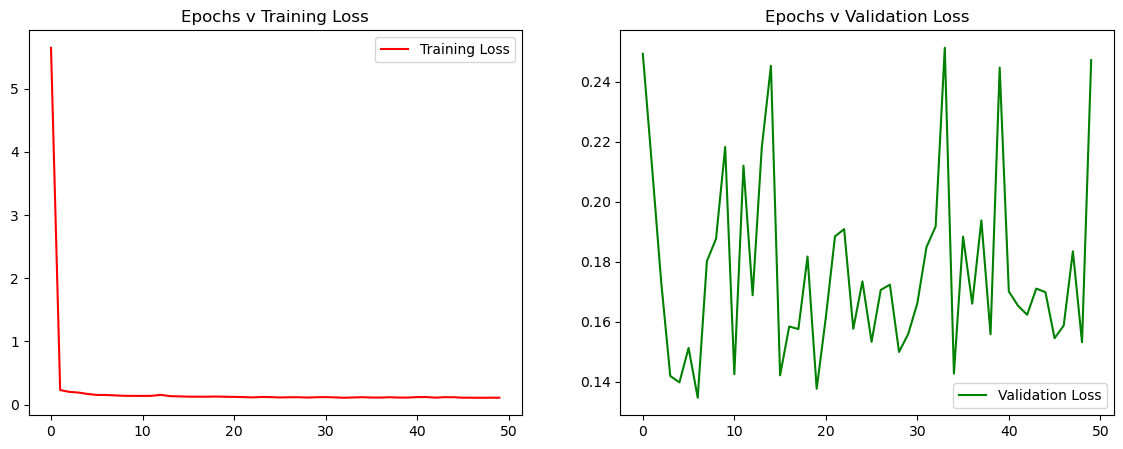

In [100]:
dic = history.history

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(dic['loss'], label='Training Loss', color='r')
axs[0].set_title('Epochs v Training Loss')
axs[0].legend()

axs[1].plot(dic['val_loss'], label='Validation Loss', color='g')
axs[1].set_title('Epochs v Validation Loss')
axs[1].legend()

#### Training Loss v Epoch

This graph shows how the loss (Mean Squared Error) decreases over the course of training. A steady decline in loss indicates the model is improving, while a plateau or increase could signal overfitting or insufficient training.

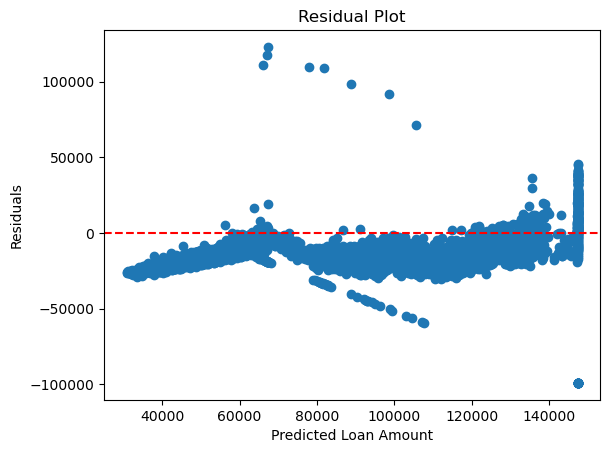

In [101]:
residuals = y_test - y_pred_scaled_removed
plt.scatter(y_pred_scaled_removed, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Loan Amount')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### Residual Plot

This plot shows the residuals (errors) against the predicted values. For a good model, residuals should be randomly scattered around zero, with no clear pattern. Patterns in the residuals may indicate model bias or missing features.

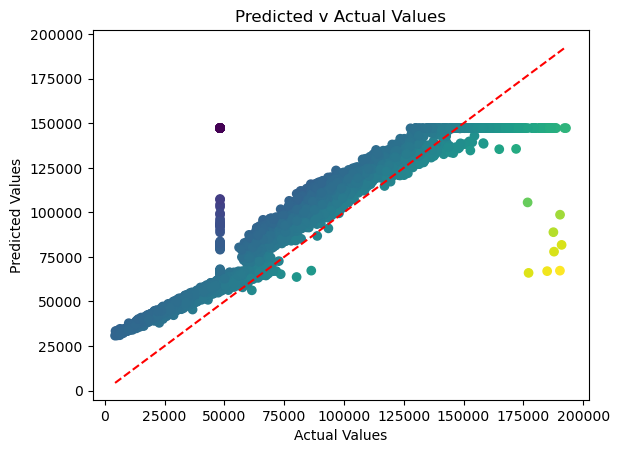

In [102]:
plt.scatter(y_test, y_pred_scaled_removed, c=residuals)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted v Actual Values")

min_val = min(min(y_test), min(y_pred_scaled_removed))
max_val = max(max(y_test), max(y_pred_scaled_removed))
# print(min_val)
# print(max_val)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line (y = x)')
plt.show()

#### Predicted vs Actual Values

This scatter plot compares the model’s predicted values to the actual values. Ideally, points should align along the diagonal line, indicating accurate predictions. Larger deviations from the line suggest higher prediction errors.